In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from itertools import combinations
from collections import defaultdict

1.1.1. Manipulation de dataset :


In [2]:
# Charger le fichier CSV dans un DataFrame
file_path = "Dataset1.csv"
df = pd.read_csv(file_path)
# Afficher les premières lignes du DataFrame
print(df.head(885))
# Informations sur le dataset (types de données, valeurs manquantes, etc.)
print(df.info())

       N     P    K    pH    EC    OC      S    Zn    Fe    Cu     Mn     B  \
0    138   8.6  560  7.46  0.62  0.70   5.90  0.24  0.31  0.77   8.71  0.11   
1    213   7.5  338  7.62  0.75  1.06  25.40  0.30  0.86  1.54   2.89  2.29   
2    163   9.6  718  7.59  0.51  1.11  14.30  0.30  0.86  1.57   2.70  2.03   
3    157   6.8  475  7.64  0.58  0.94  26.00  0.34  0.54  1.53   2.65  1.82   
4    270   9.9  444  7.63  0.40  0.86  11.80  0.25  0.76  1.69   2.43  2.26   
..   ...   ...  ...   ...   ...   ...    ...   ...   ...   ...    ...   ...   
880  276   9.2  370  7.62  0.62  0.49   6.64  0.42  3.57  0.63   6.48  0.32   
881  320  13.8  391  7.38  0.65  1.07   5.43  0.58  4.58  1.02  13.25  0.53   
882  264  10.3  475  7.49  0.74  0.88  10.56  0.45  7.36  1.87  10.63  0.63   
883  220   8.6  444  7.43  0.65  0.72  11.70  0.37  0.66  0.90   2.19  1.82   
884  270   8.1  655  7.45  0.55  0.67  10.20  0.28  0.44  1.26   7.75  2.56   

         OM  Fertility  
0    1.2040          0  
1

Description globale du dataset :

Le dataset contenir des informations sur les caractéristiques du sol, avec différentes mesures telles que les niveaux d'azote (N), de phosphore (P), de potassium (K), le pH, la conductivité électrique (EC), le carbone organique (OC), le soufre (S), le zinc (Zn), le fer (Fe), le cuivre (Cu), le manganèse (Mn), le bore (B), la matière organique (OM), et un attribut de fertilité (Fertility).

Description de chaque attribut :

N (Azote) : Mesure de la quantité d'azote dans le sol.
P (Phosphore) : Mesure de la quantité de phosphore dans le sol.
K (Potassium) : Mesure de la quantité de potassium dans le sol.
pH : Mesure du niveau de pH dans le sol, indiquant son acidité ou son alcalinité.
EC (Conductivité électrique) : Mesure de la capacité du sol à conduire l'électricité.
OC (Carbone organique) : Mesure de la quantité de carbone organique dans le sol.
S (Soufre) : Mesure de la quantité de soufre dans le sol.
Zn (Zinc) : Mesure de la quantité de zinc dans le sol.
Fe (Fer) : Mesure de la quantité de fer dans le sol.
Cu (Cuivre) : Mesure de la quantité de cuivre dans le sol.
Mn (Manganèse) : Mesure de la quantité de manganèse dans le sol.
B (Bore) : Mesure de la quantité de bore dans le sol.
OM (Matière organique) : Mesure de la quantité de matière organique dans le sol.
Fertility (Fertilité) : Attribut cible, probablement indiquant le niveau de fertilité du sol (0, 1, 2, etc.).

1.1.2. Analyse des caractéristiques des attributs du dataset :

In [3]:
def Tendences_Centrale(file_path):
    df = pd.read_csv(file_path)
    for col in df.columns:
        numeric_values = df[col].apply(pd.to_numeric, errors='coerce').dropna()
        print('moyenne de {} :: {}'.format(col, sum(numeric_values) / len(numeric_values)))

        
        
        tri= sorted(df[col])
        lenn= len(tri)
        if lenn % 2 ==1:
            mediane= tri[lenn // 2]
        else:
            milieu_inf = tri[lenn // 2]
            milieu_sup = tri[(lenn  // 2)-1]
            mediane = (milieu_inf+ milieu_sup)/2
        print('Mediane de {} :: {}'.format(col, mediane))
        
        frequency_dict = {}
        for value in df[col]:
            if value in frequency_dict:
                frequency_dict[value] += 1
            else:
                frequency_dict[value] = 1
        #fréquence maximale
        max_frequency = max(frequency_dict.values())
        mode = [value for value, frequency in frequency_dict.items() if frequency == max_frequency]
        print('Mode de {} :: {}'.format(col, mode))
        # Fonction pour calculer la symétrie

        n = len(df[col])
        mean_value = sum(numeric_values) / len(numeric_values)
        std_dev = np.sqrt(sum((x - mean_value) ** 2 for x in numeric_values) / n)
        skewness = sum((x - mean_value) ** 3 for x in numeric_values) * n / ((n - 1) * (n - 2) * std_dev ** 3)
        print('symétries de {} :: {}'.format(col, skewness))

        print("#############")

Tendences_Centrale("Dataset1.csv")

moyenne de N :: 246.99774011299436
Mediane de N :: 257
Mode de N :: [207]
symétries de N :: -0.6301437625783566
#############
moyenne de P :: 14.555266138165337
Mediane de P :: 7
Mode de P :: ['8.3']
symétries de P :: 3.4156380242332123
#############
moyenne de K :: 501.33898305084745
Mediane de K :: 475
Mode de K :: [444]
symétries de K :: 0.9825873517195043
#############
moyenne de pH :: 7.511954802259897
Mediane de pH :: 7.5
Mode de pH :: [7.5]
symétries de pH :: -5.104214160283122
#############
moyenne de EC :: 0.5439209039548021
Mediane de EC :: 0.55
Mode de EC :: [0.62, 0.53]
symétries de EC :: 0.09858488463943968
#############
moyenne de OC :: 0.6178167420814461
Mediane de OC :: 0.68
Mode de OC :: [0.88]
symétries de OC :: 24.430661184608073
#############
moyenne de S :: 7.545807909604521
Mediane de S :: 6.64
Mode de S :: [5.13, 4.22]
symétries de S :: 2.4609589209538485
#############
moyenne de Zn :: 0.4687231638418072
Mediane de Zn :: 0.36
Mode de Zn :: [0.28]
symétries de Zn 

Boite à Moustache

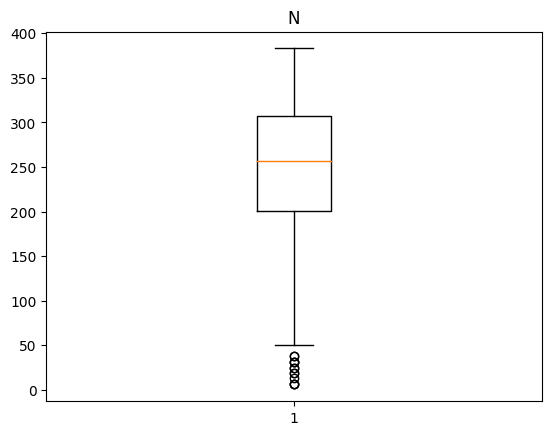

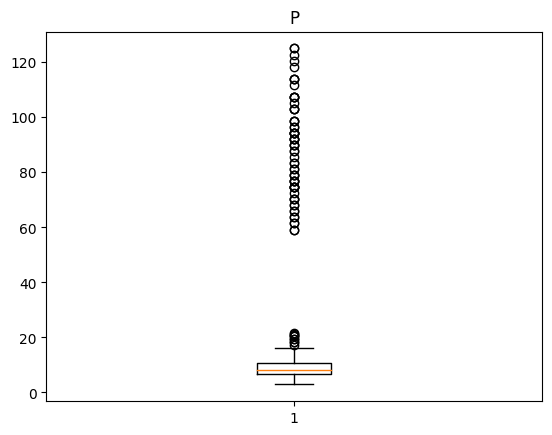

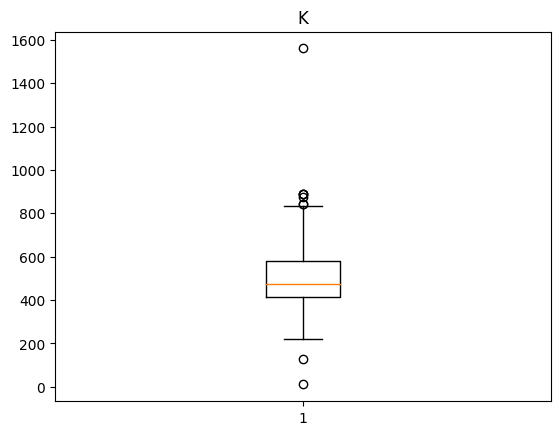

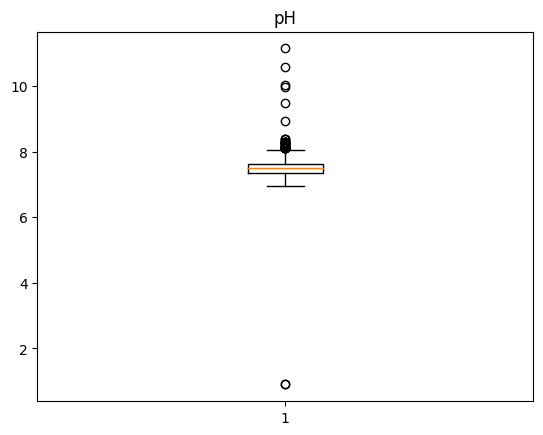

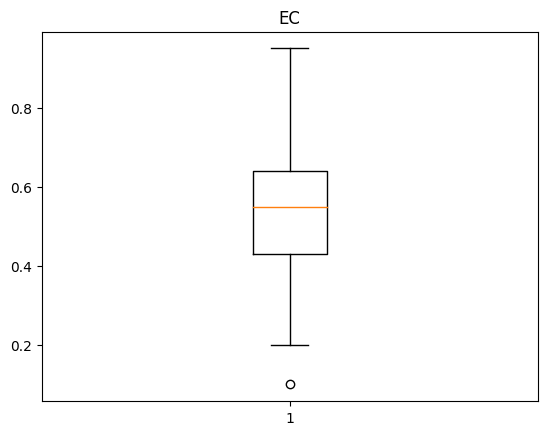

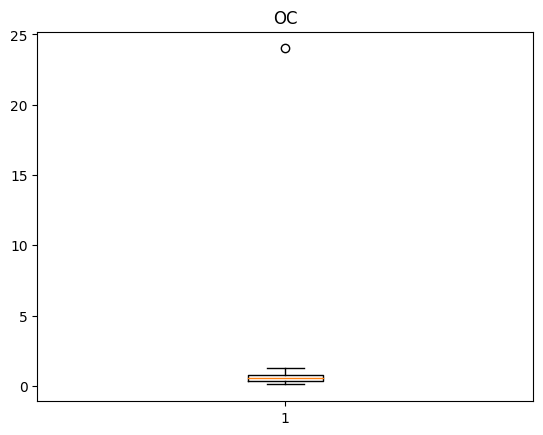

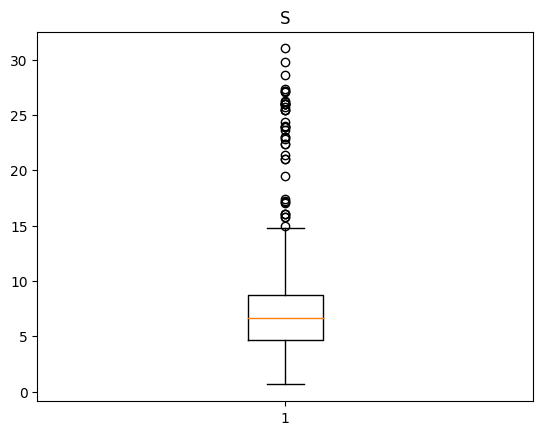

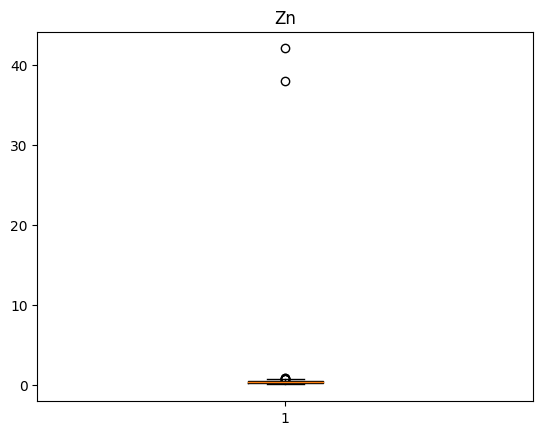

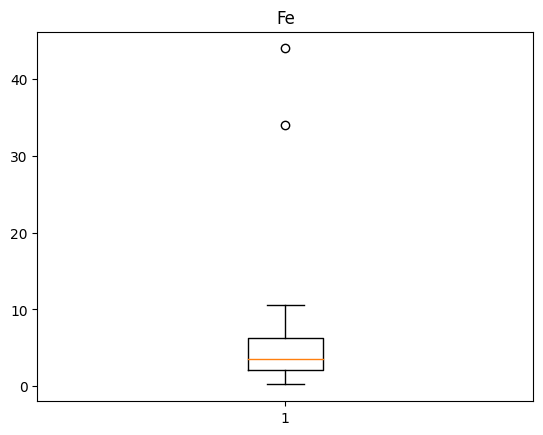

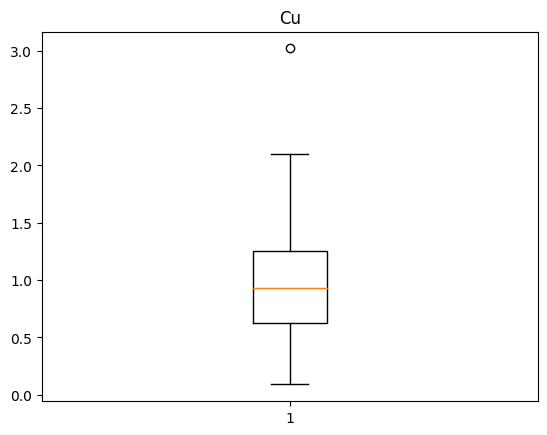

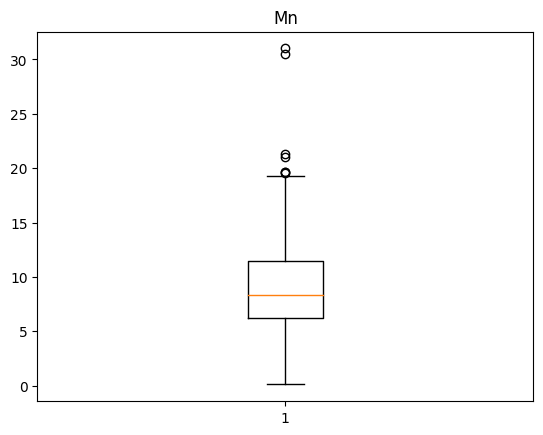

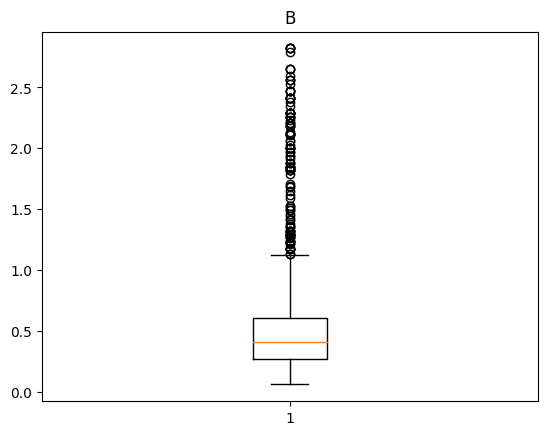

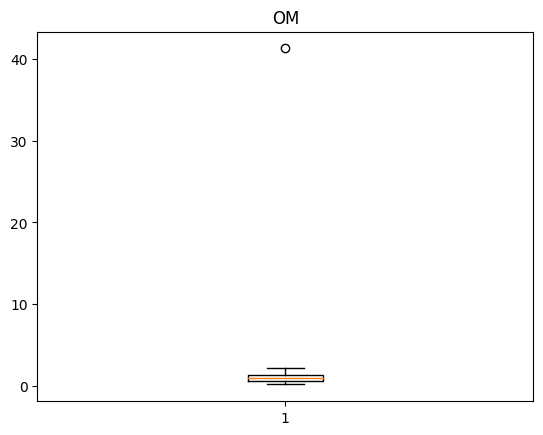

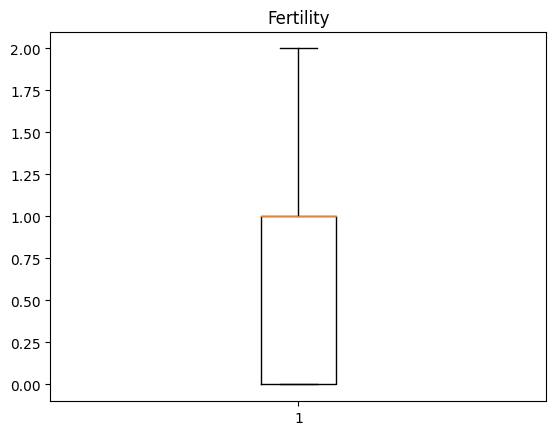

In [4]:
for col_name in df.columns:
    x=df[col_name]
    numeric_values = df[col_name].apply(pd.to_numeric, errors='coerce').dropna()

    plt.title(col_name)
    plt.boxplot(numeric_values)
    plt.show()





Histogramme et visualisation de la distribution des données

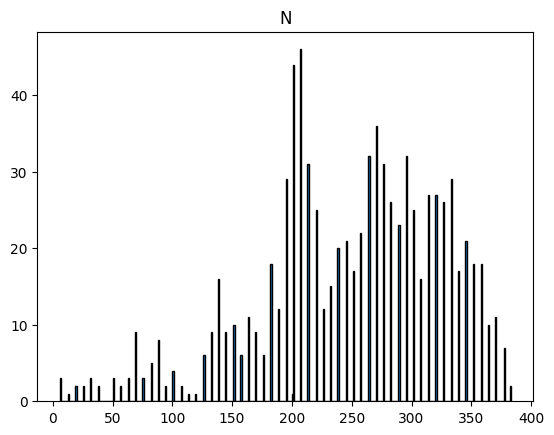

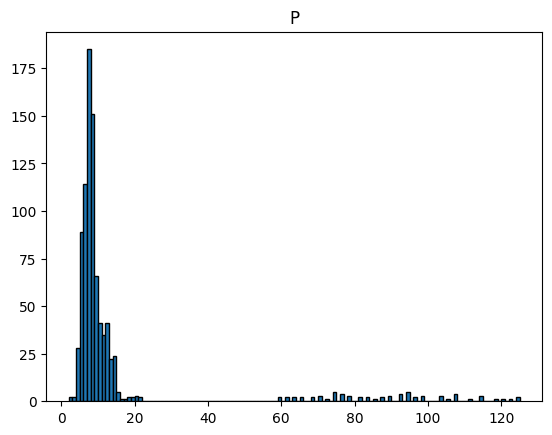

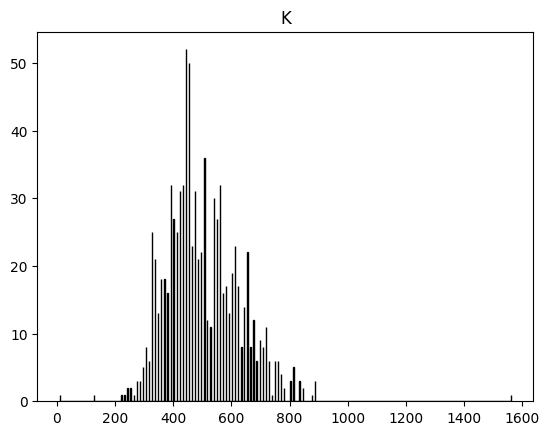

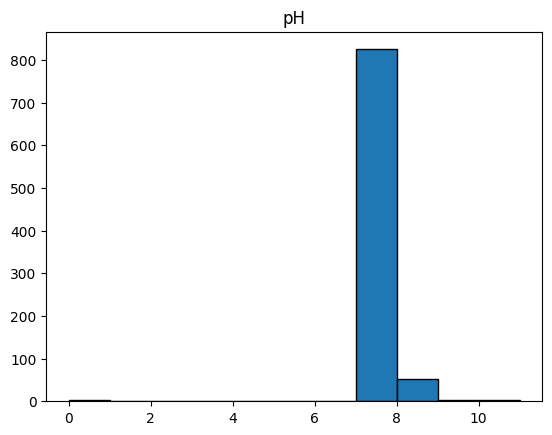

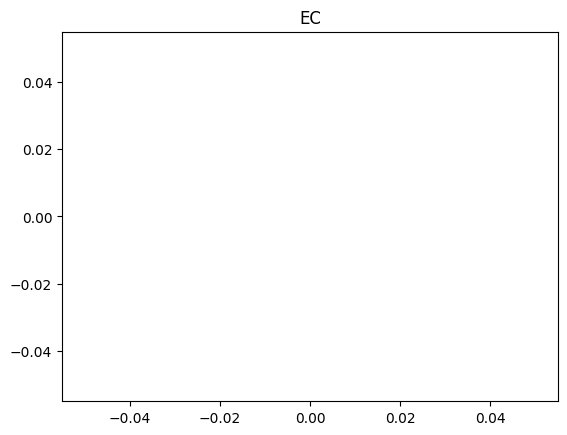

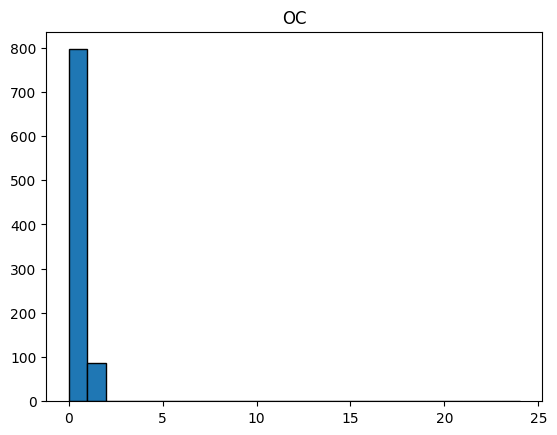

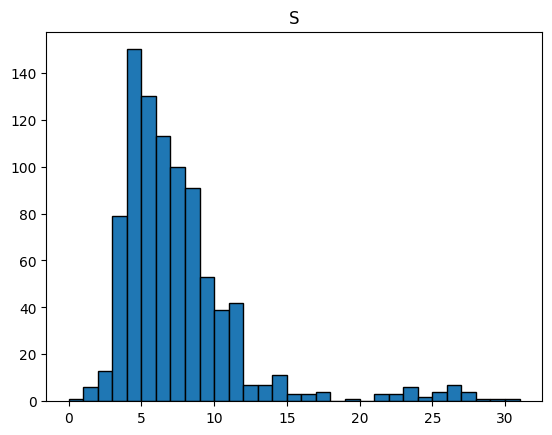

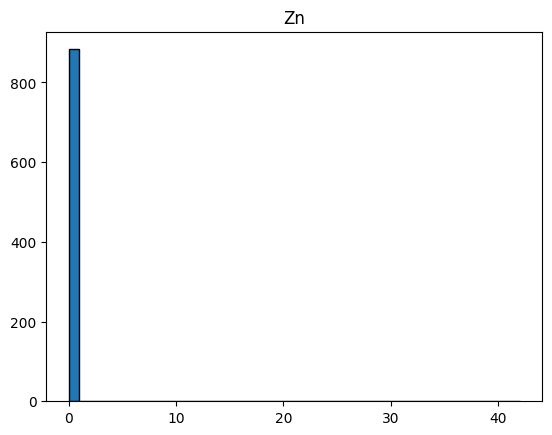

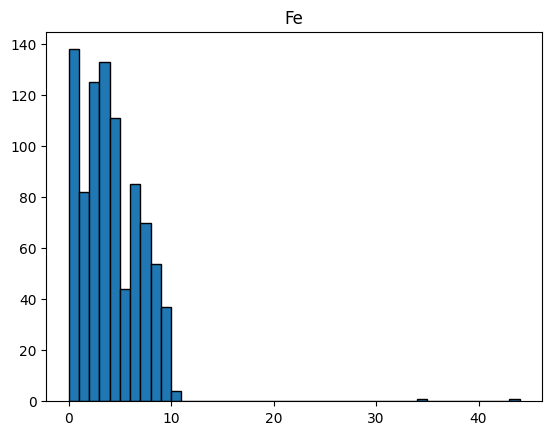

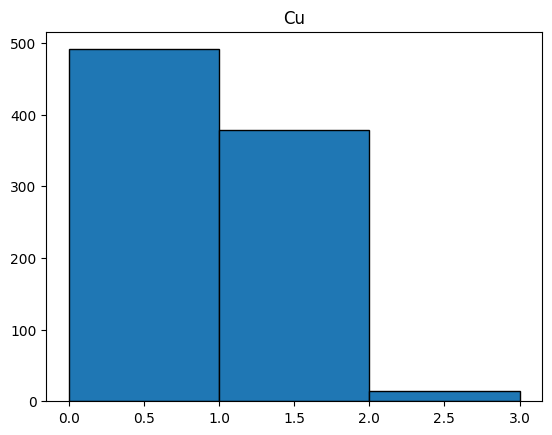

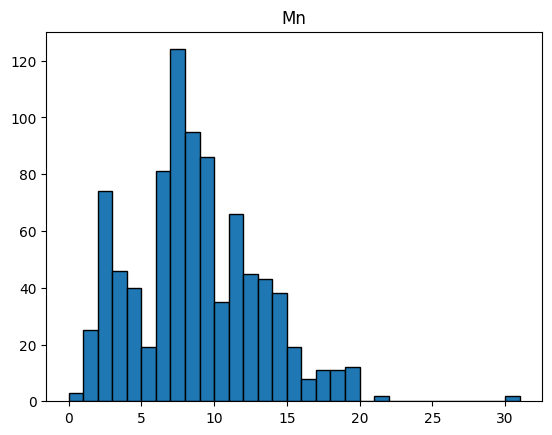

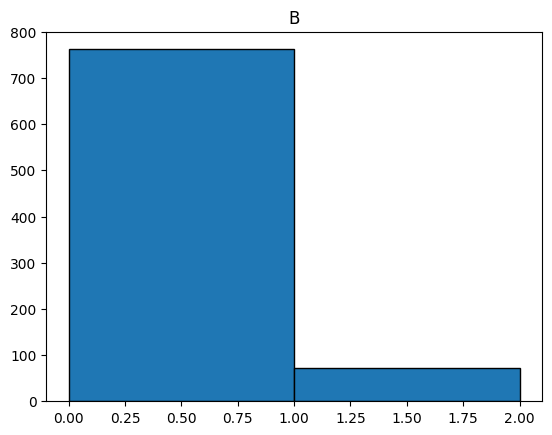

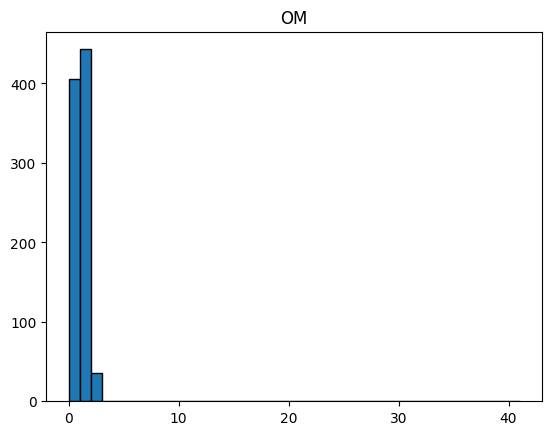

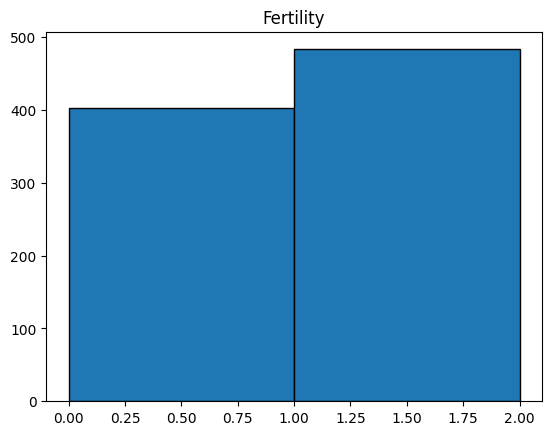

In [5]:
df = pd.read_csv(file_path)
for col_name in df.columns:
    x=df[col_name]
    numeric_values = x.apply(pd.to_numeric, errors='coerce').dropna()
    plt.hist(numeric_values,bins=range(int(min(numeric_values)), int(max(numeric_values)+1)), edgecolor='black')
    plt.title(col_name)
    plt.show()

Diagrammes de dispersion des données

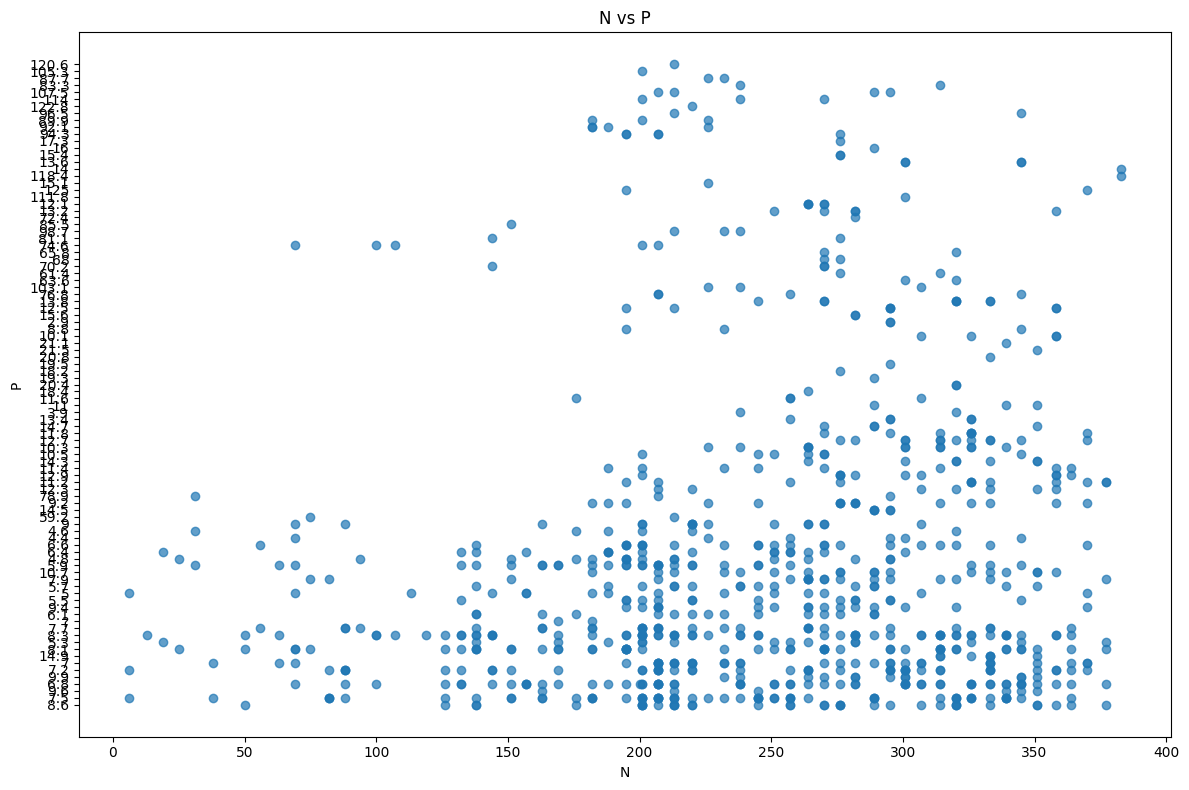

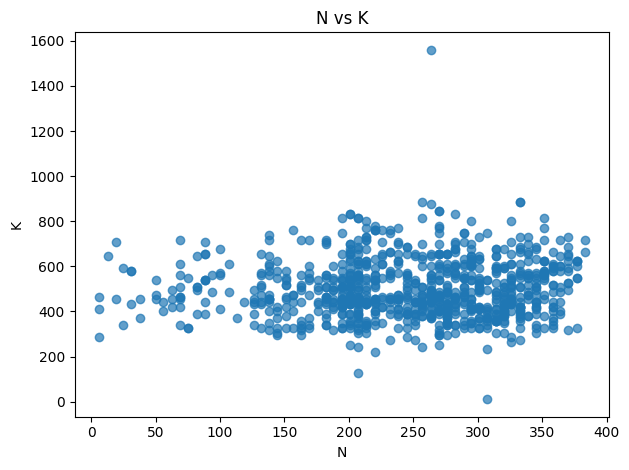

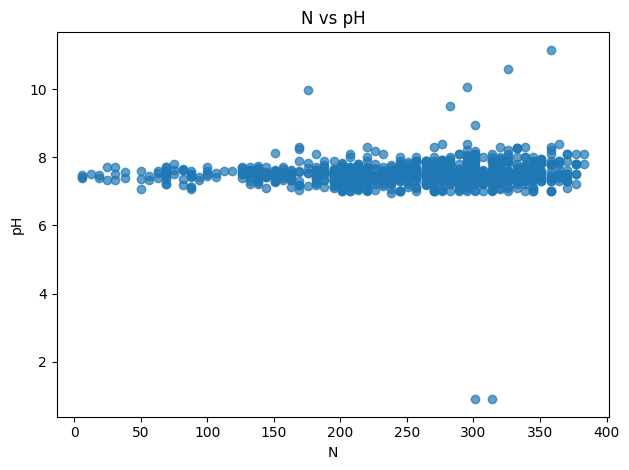

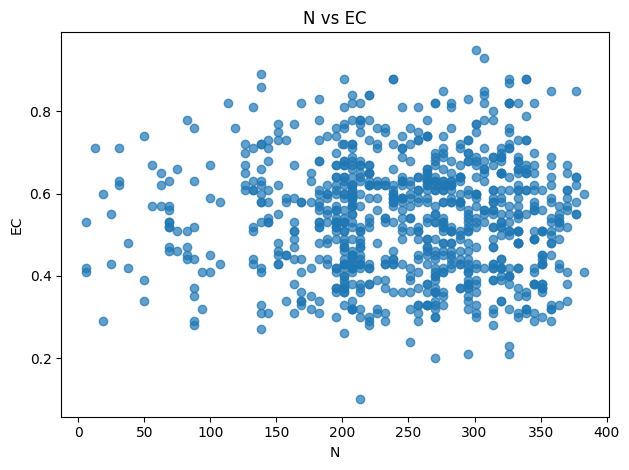

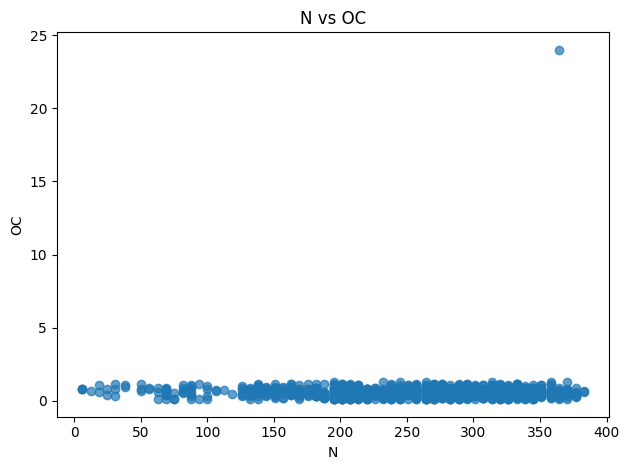

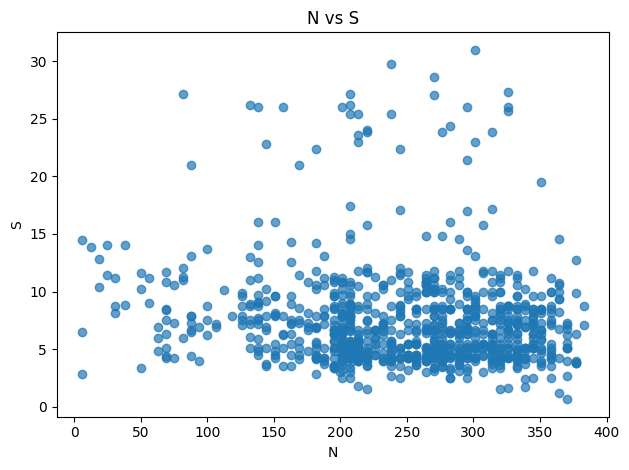

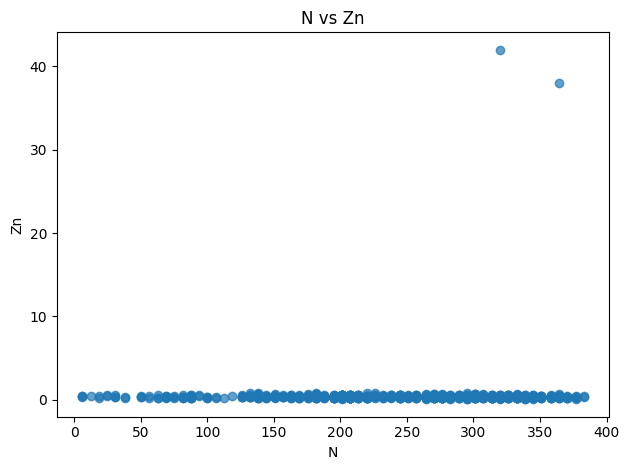

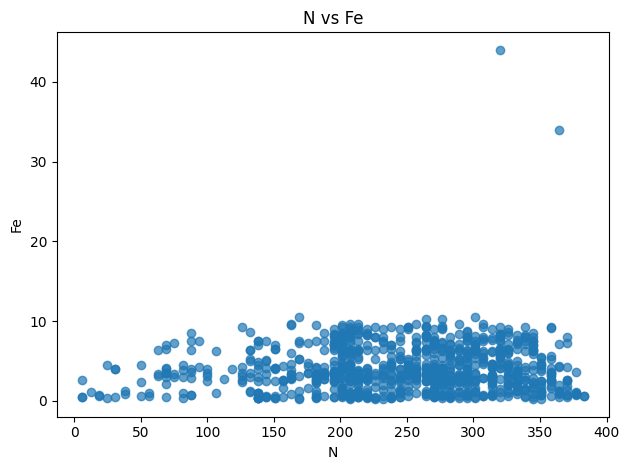

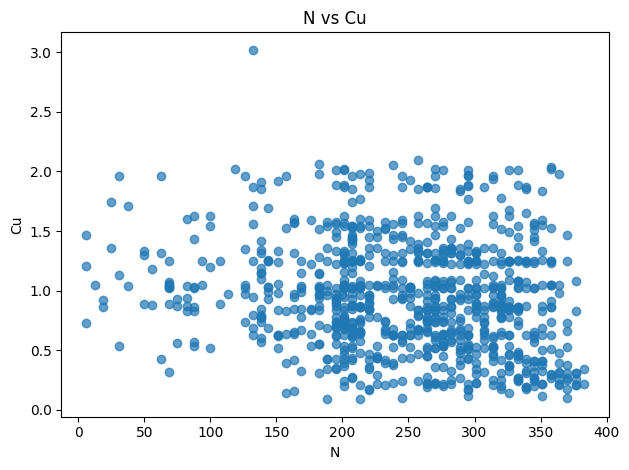

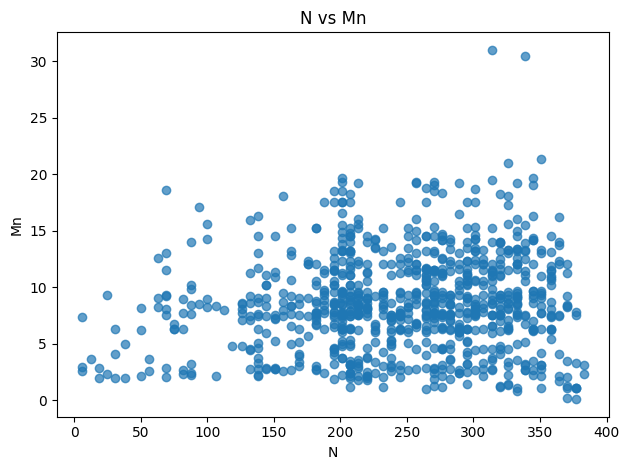

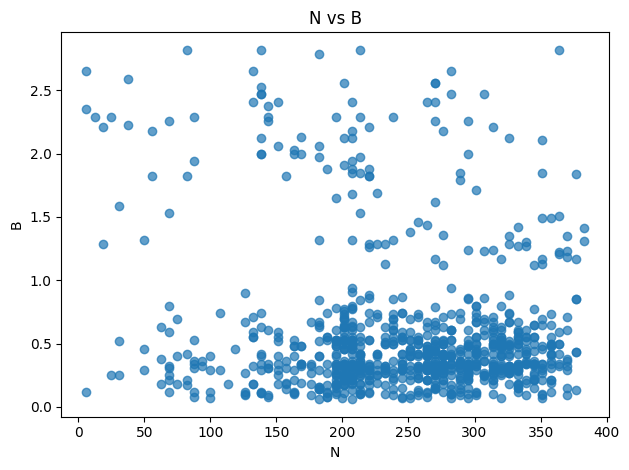

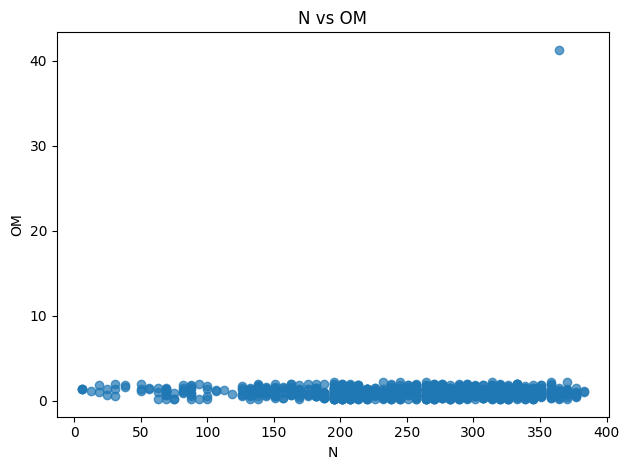

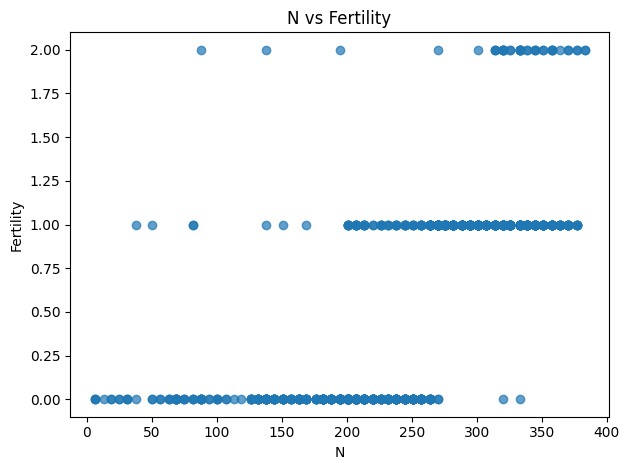

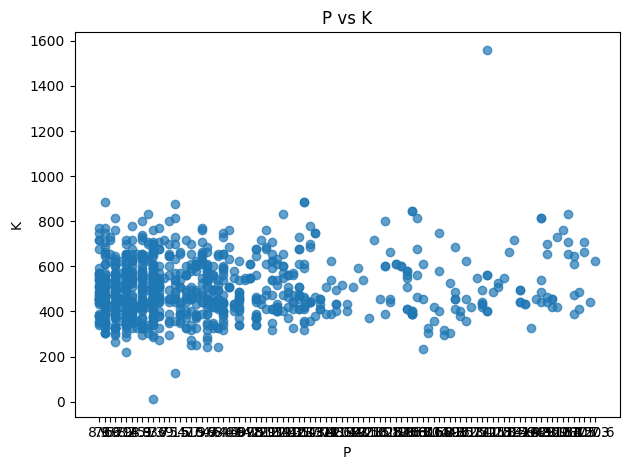

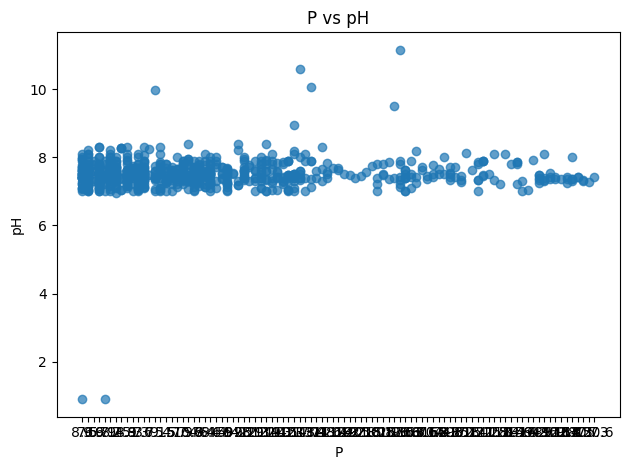

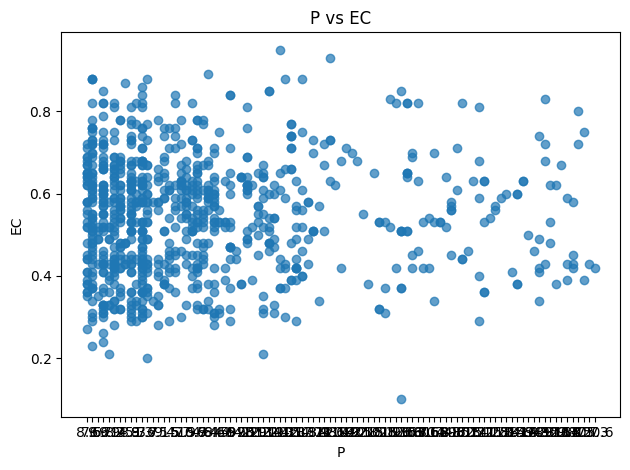

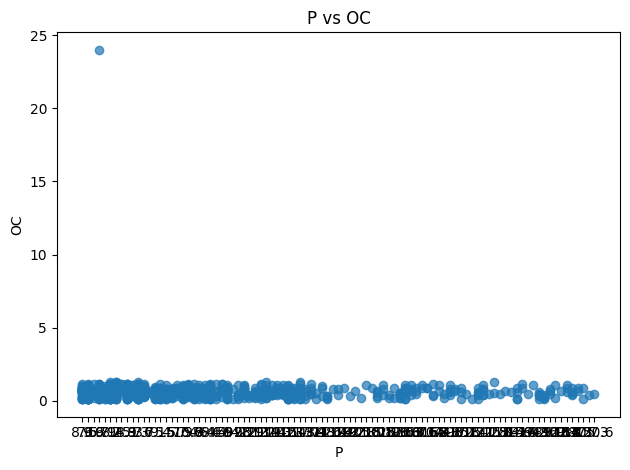

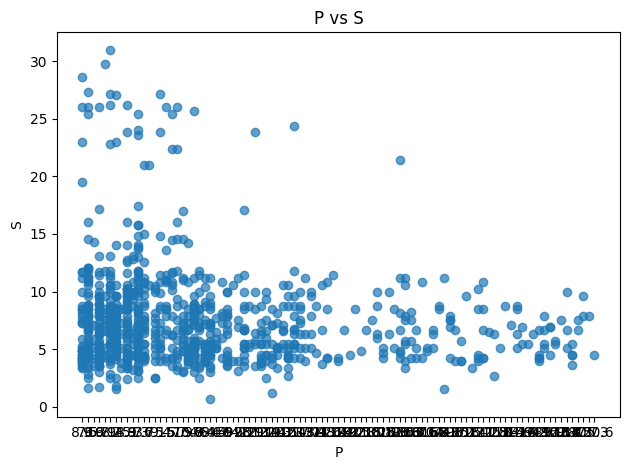

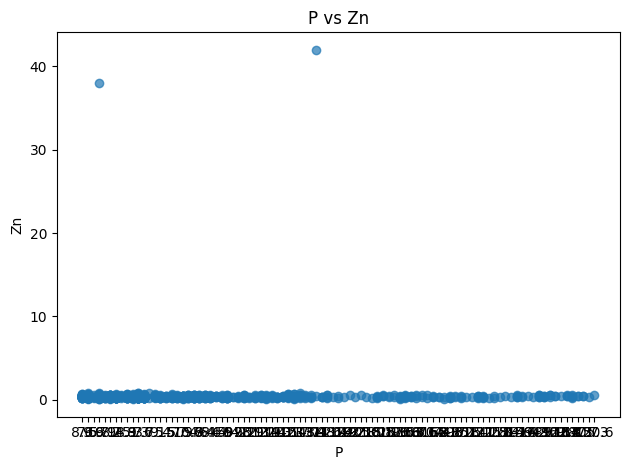

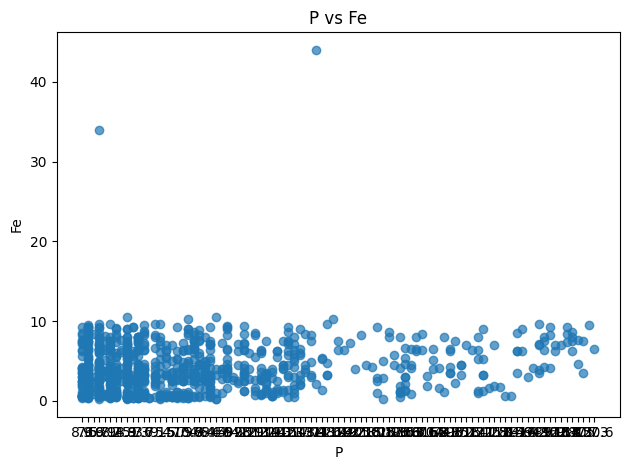

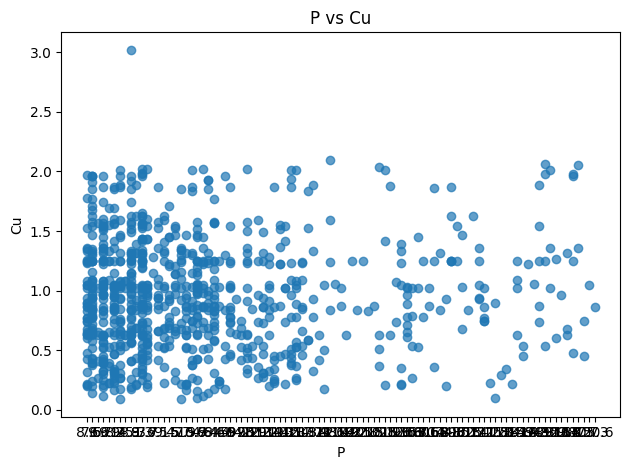

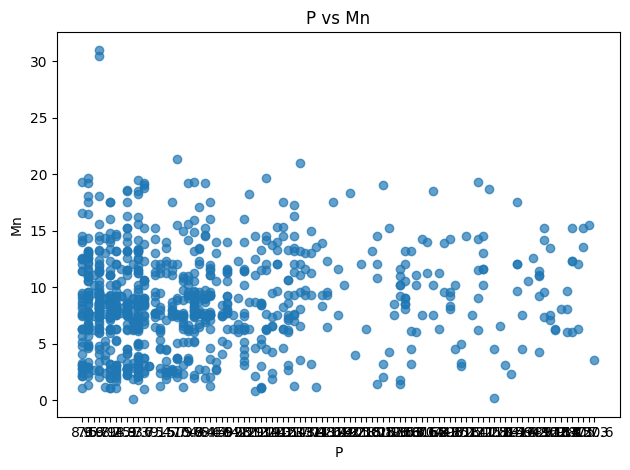

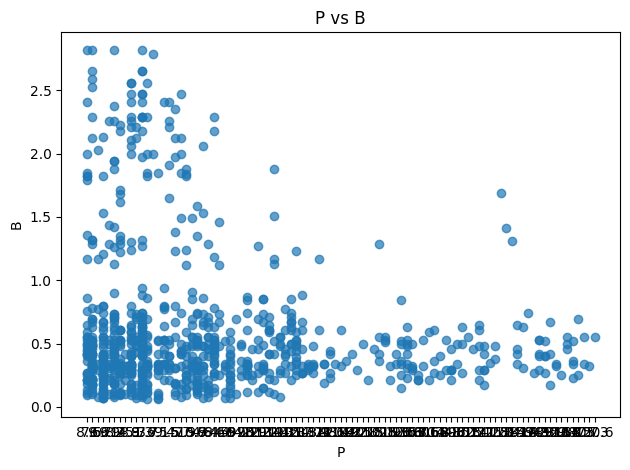

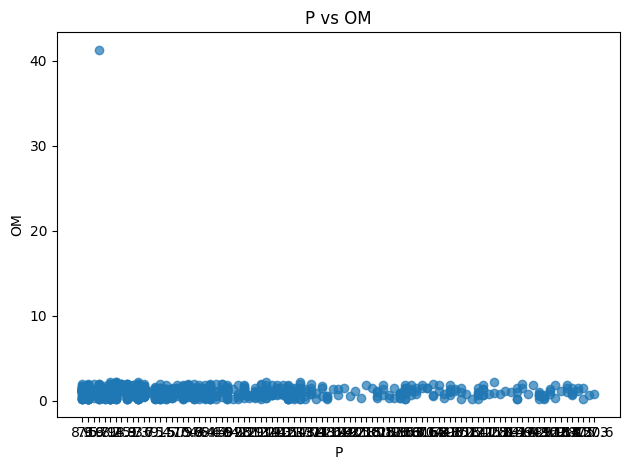

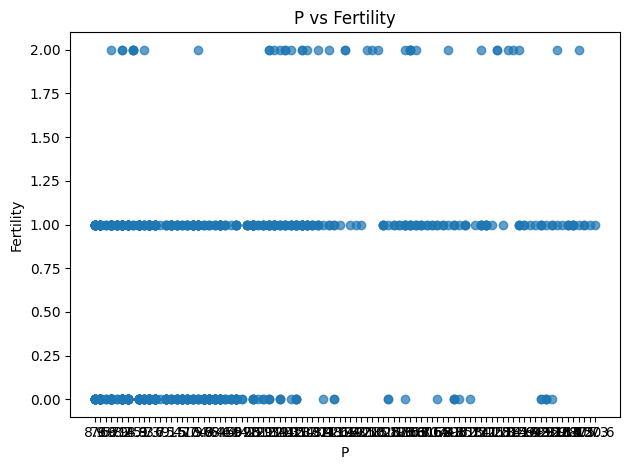

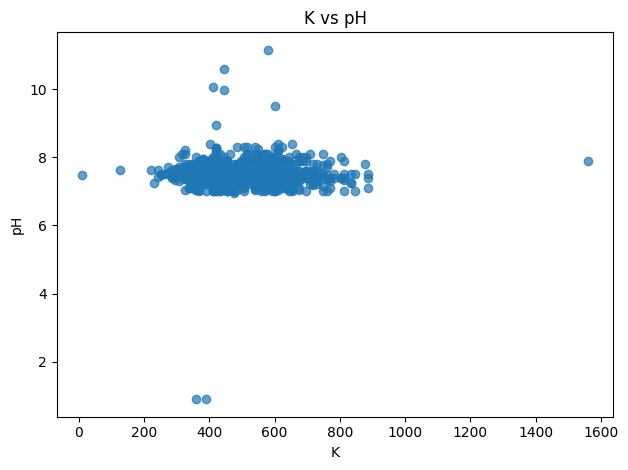

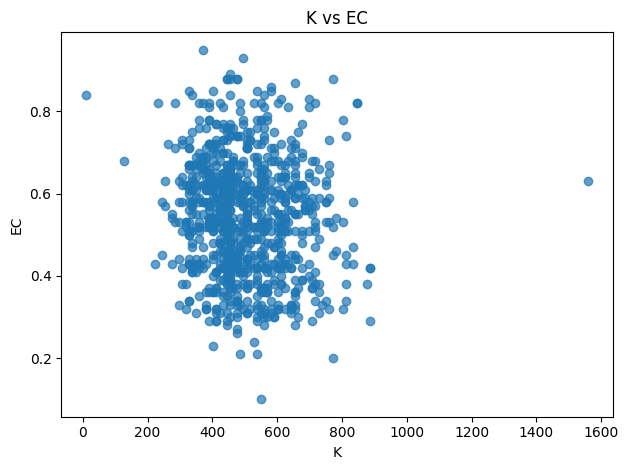

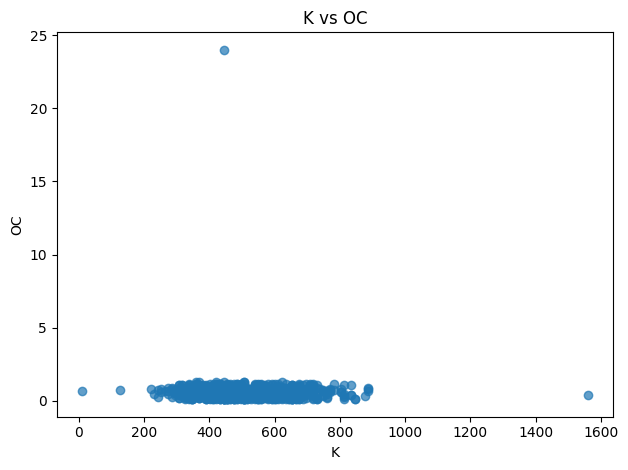

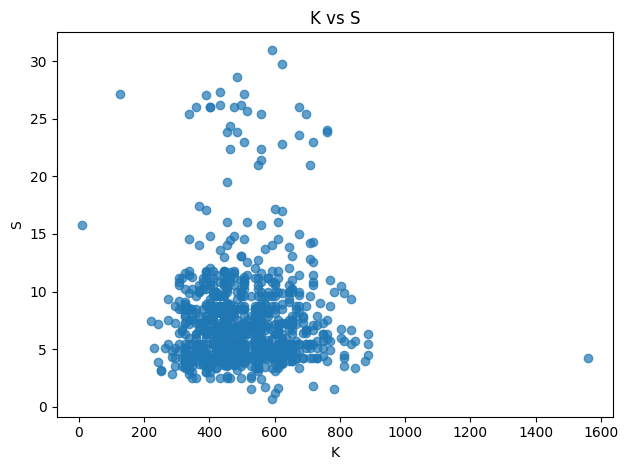

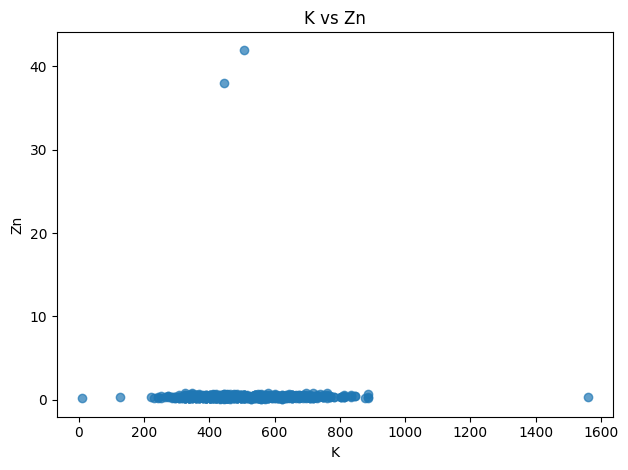

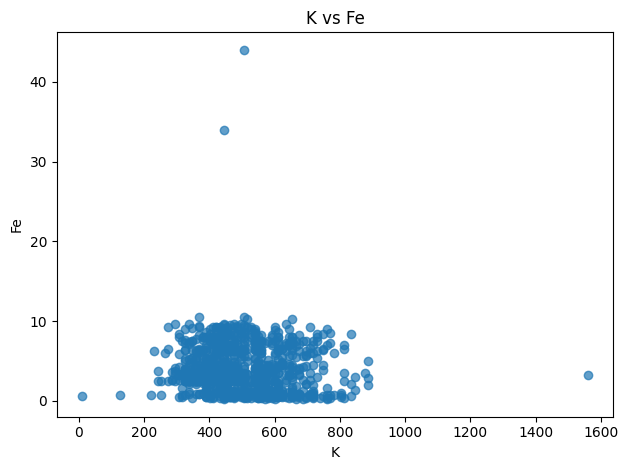

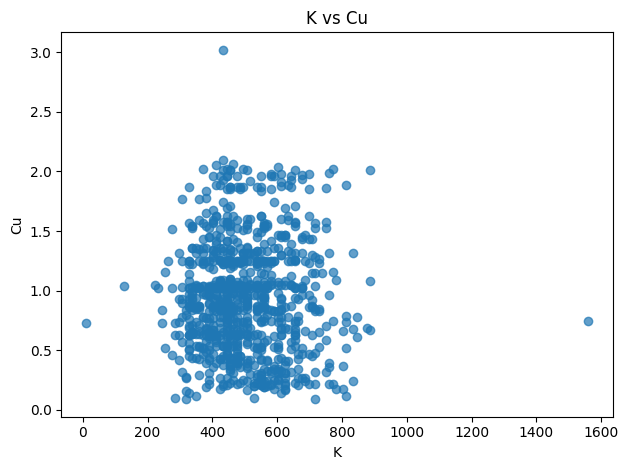

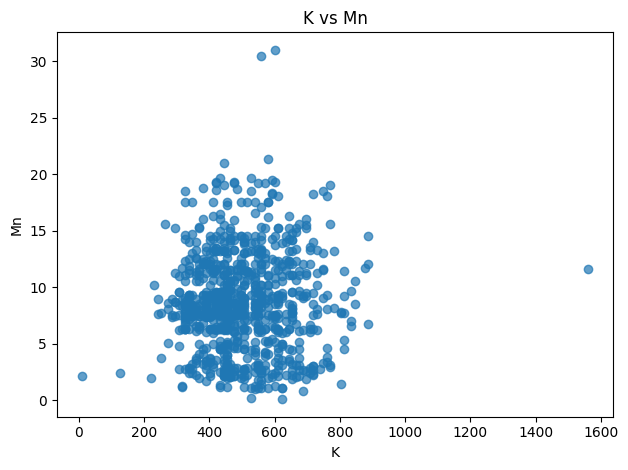

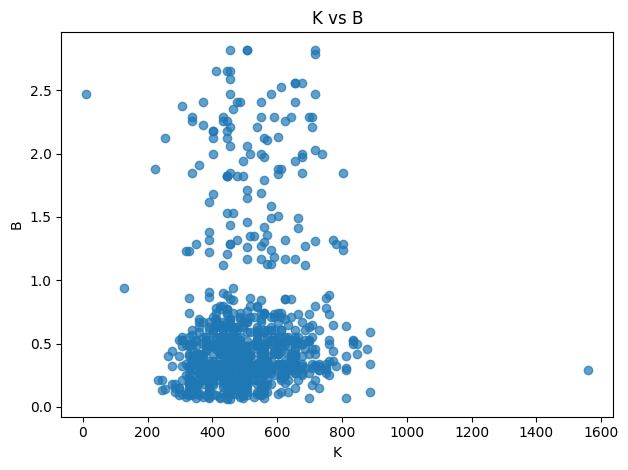

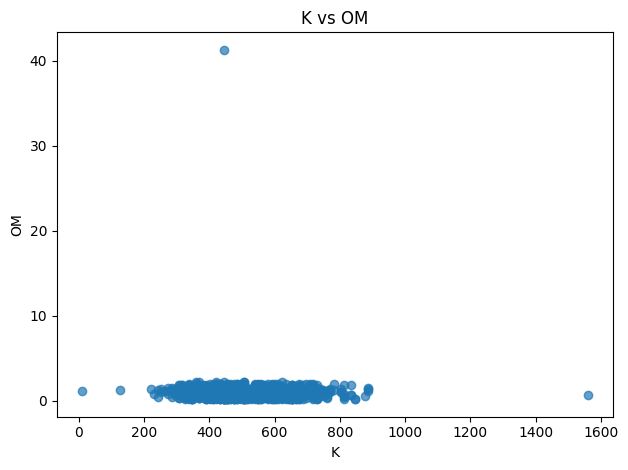

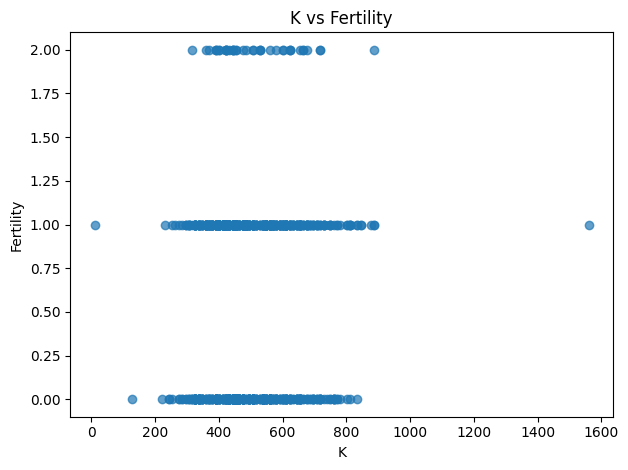

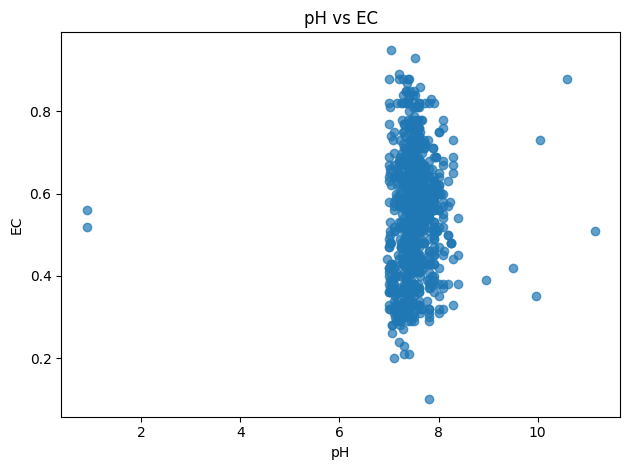

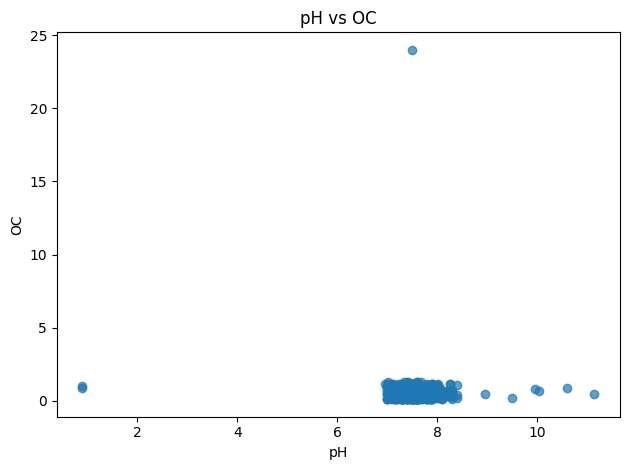

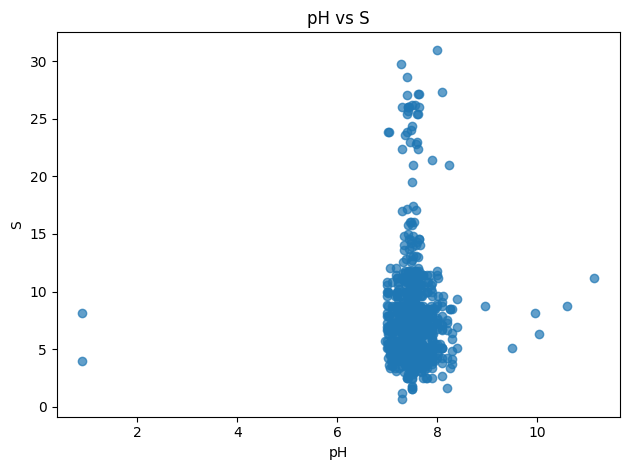

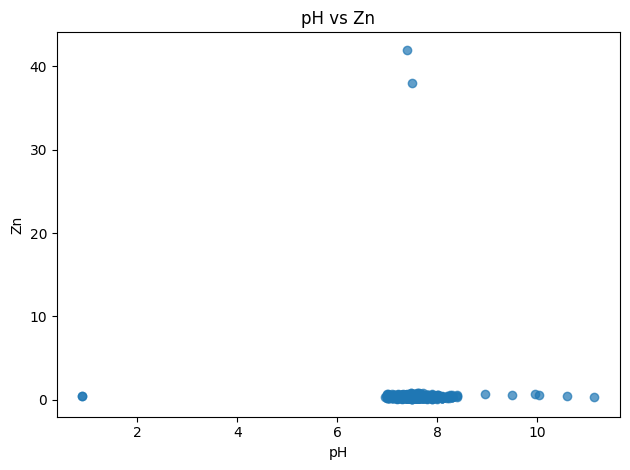

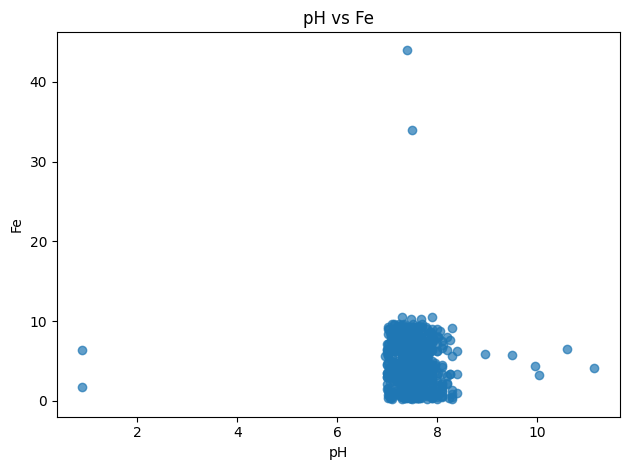

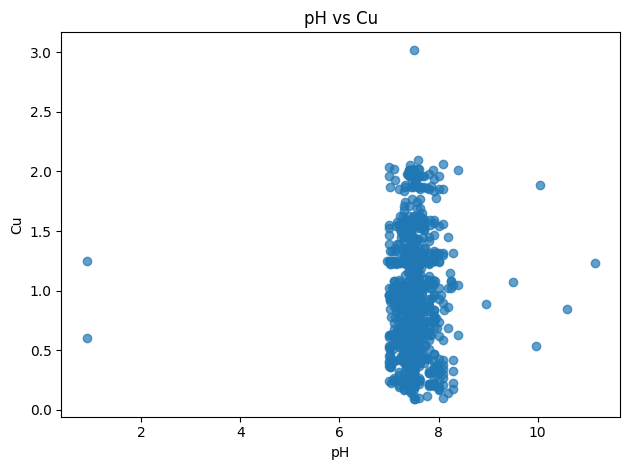

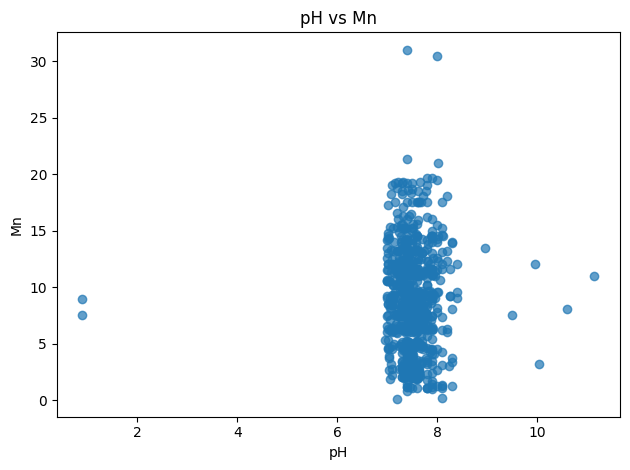

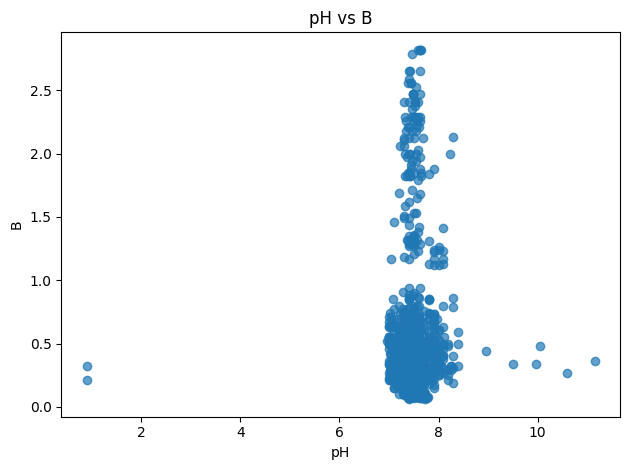

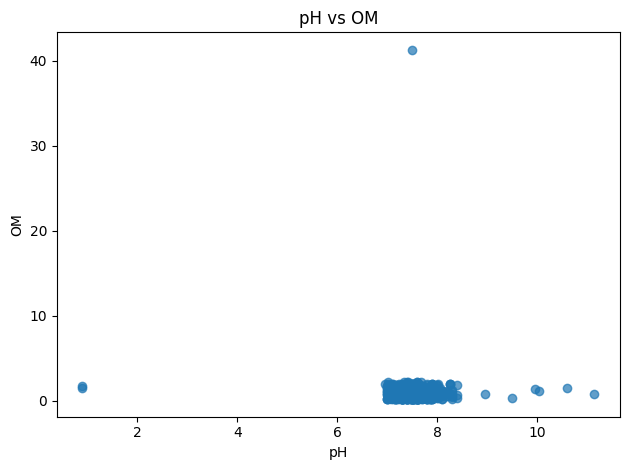

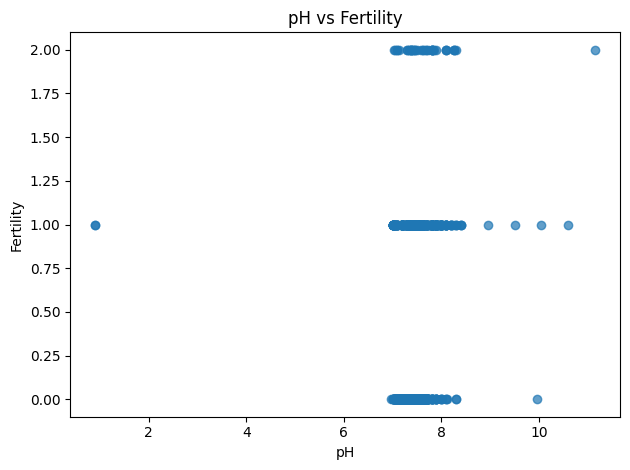

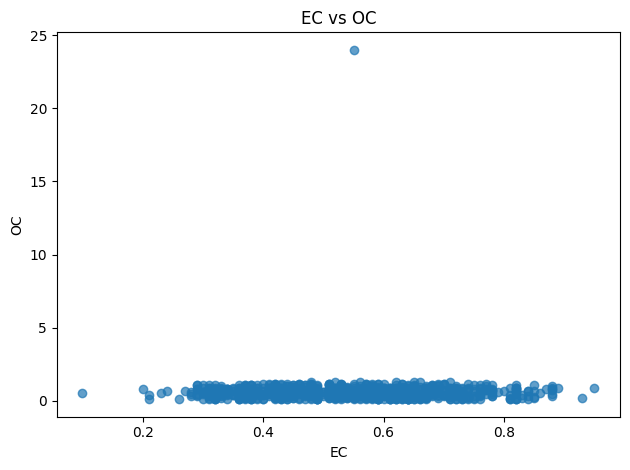

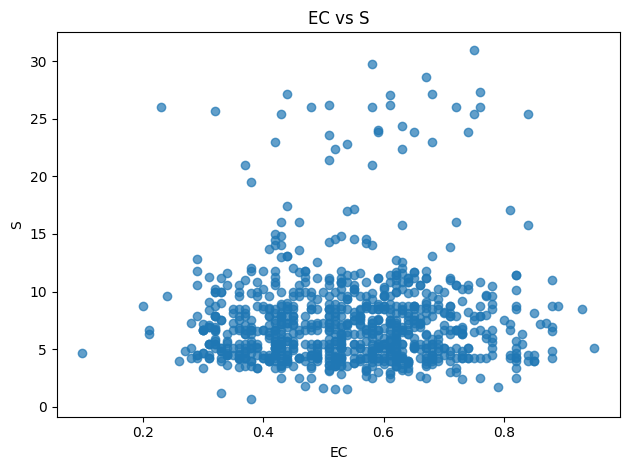

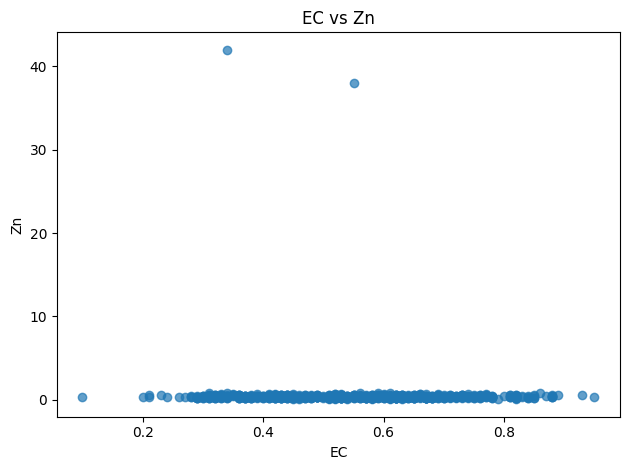

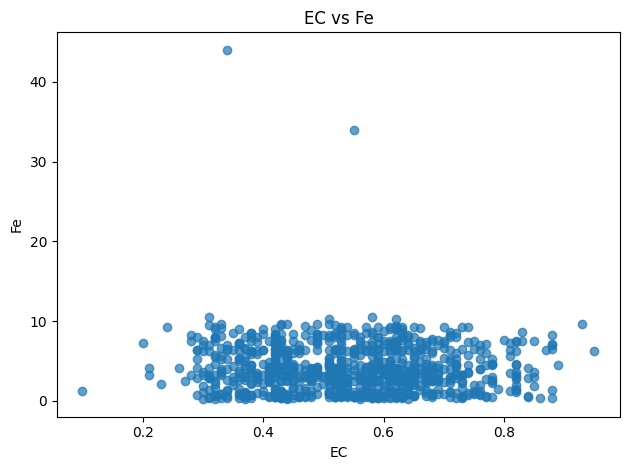

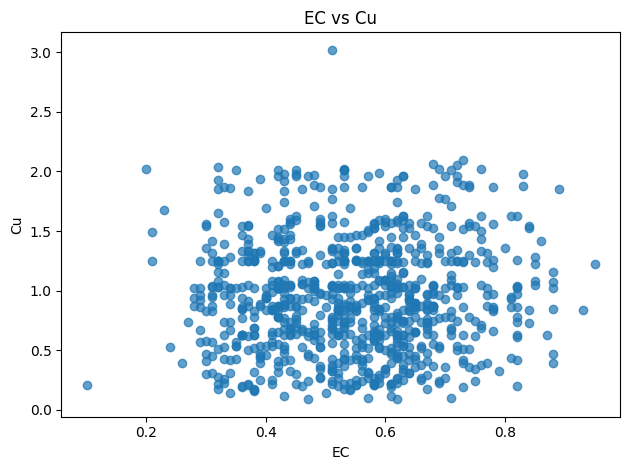

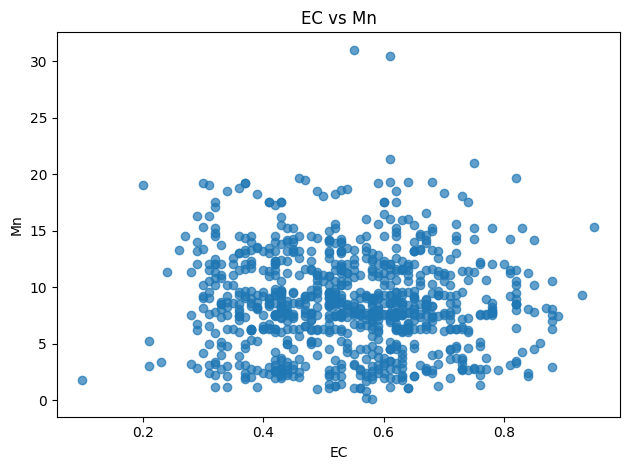

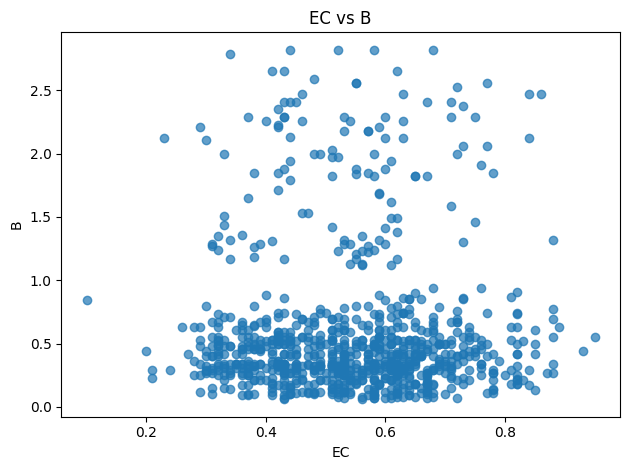

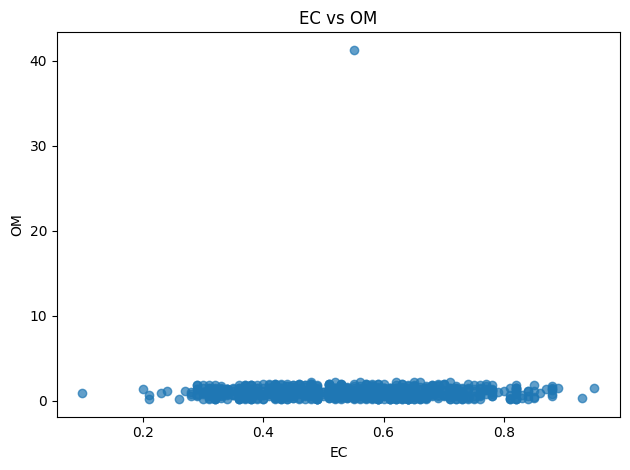

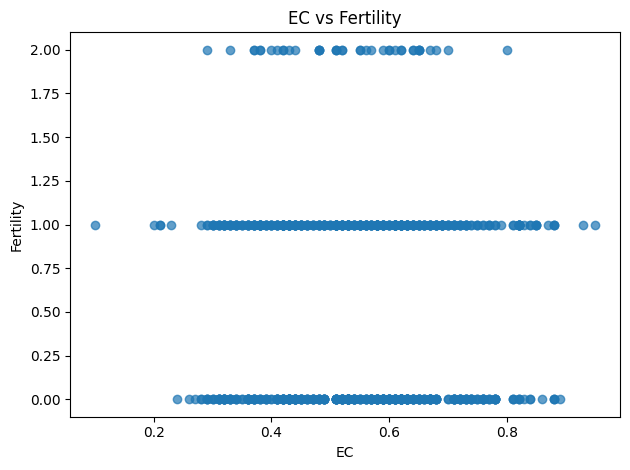

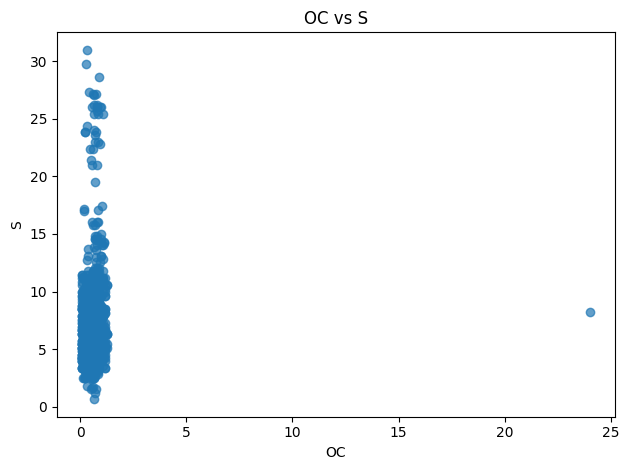

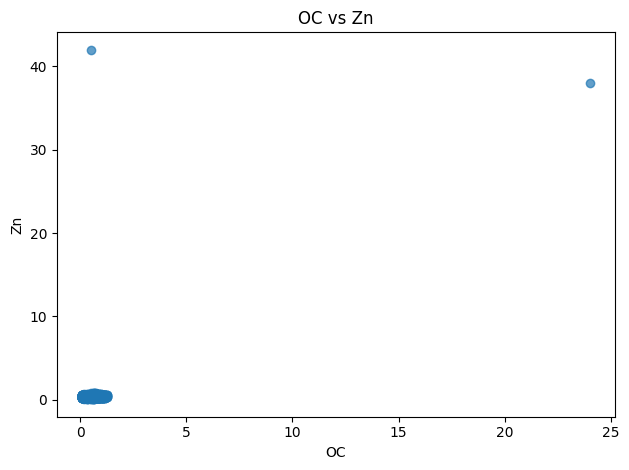

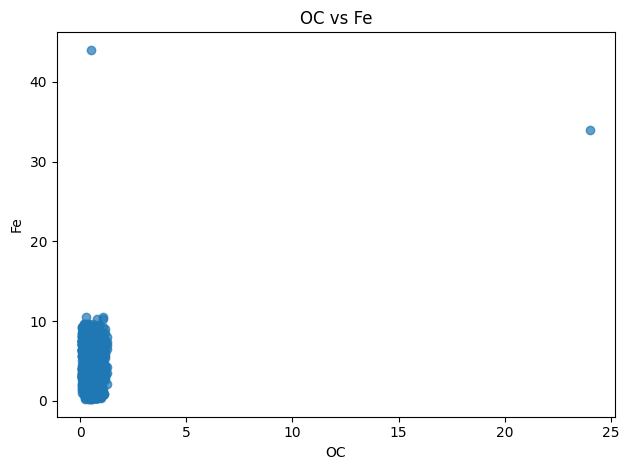

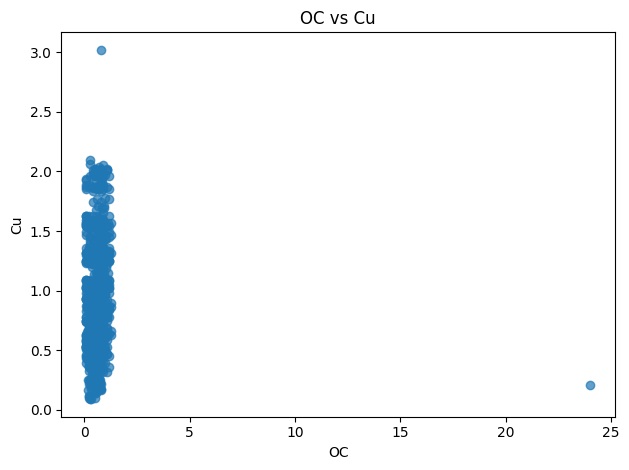

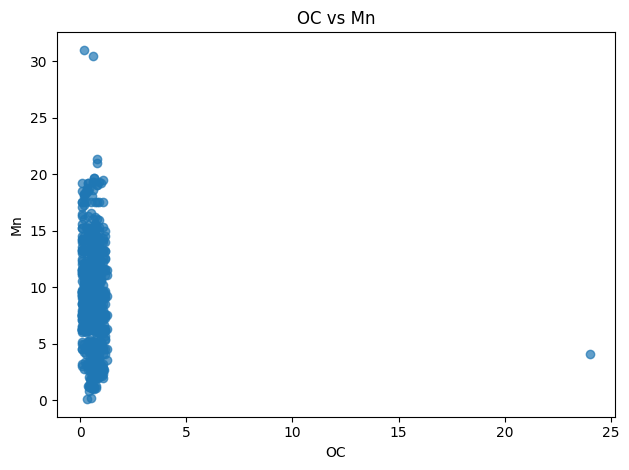

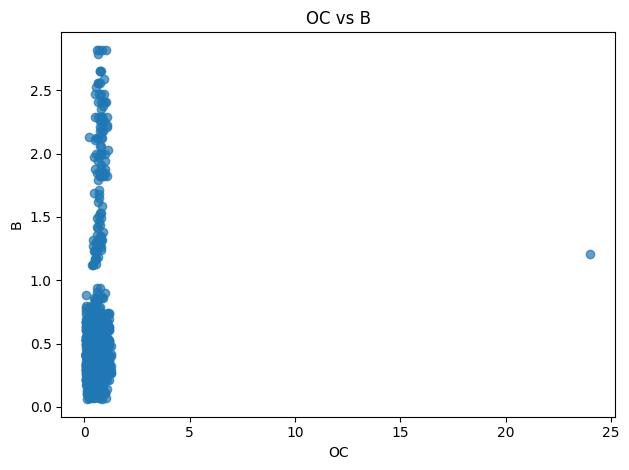

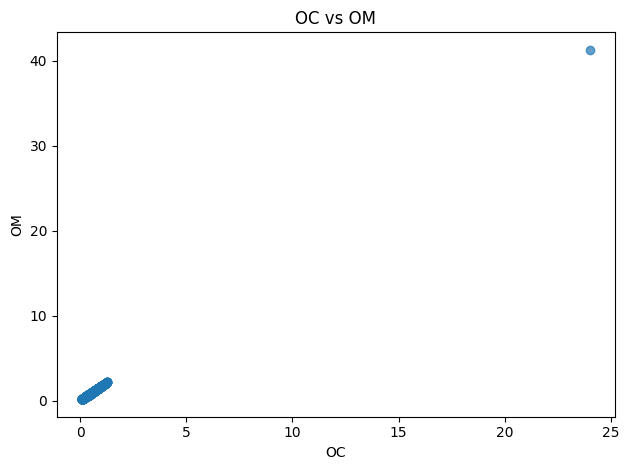

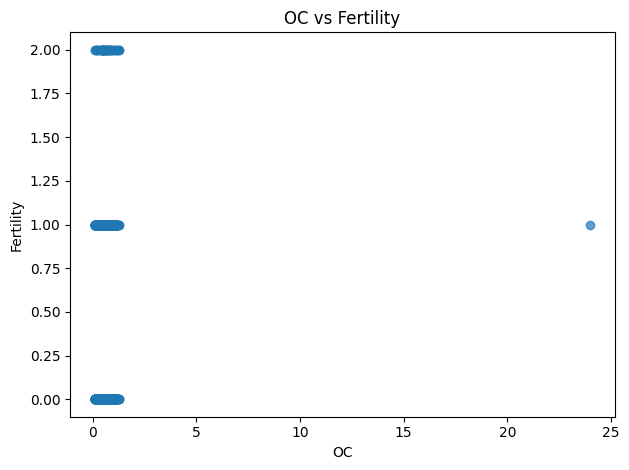

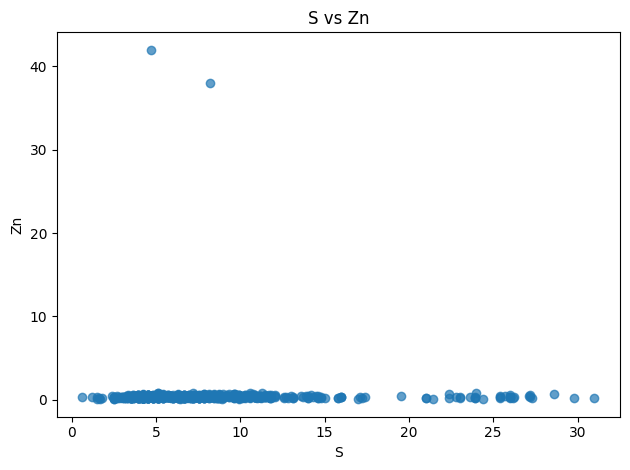

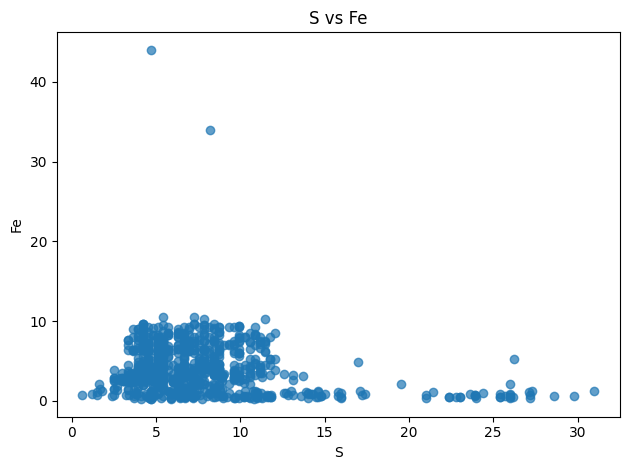

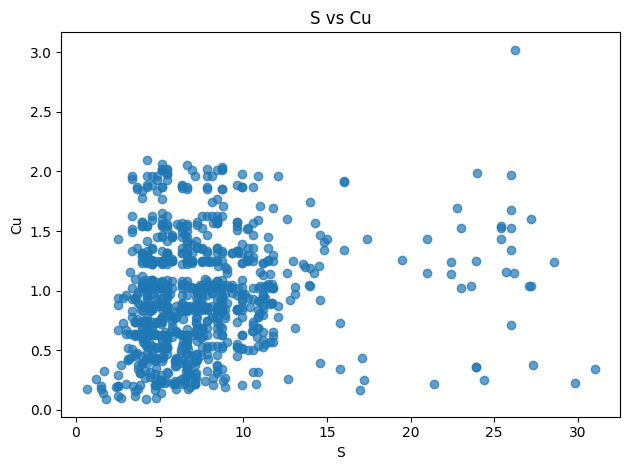

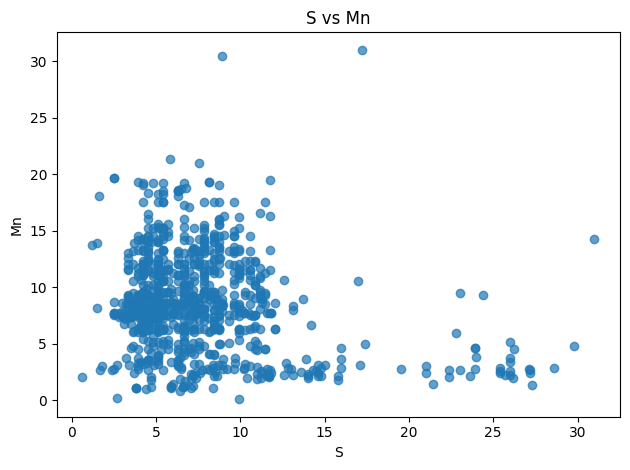

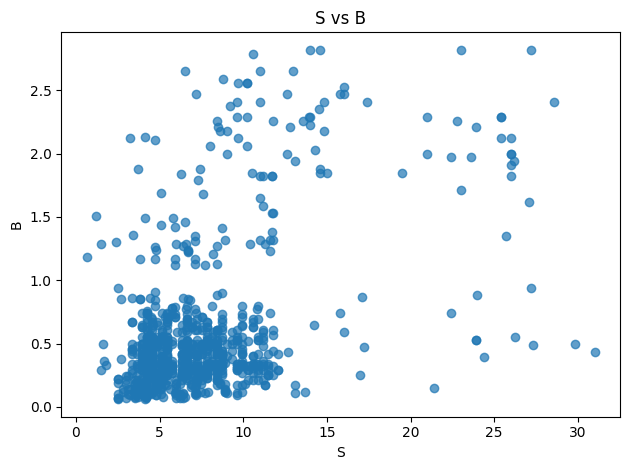

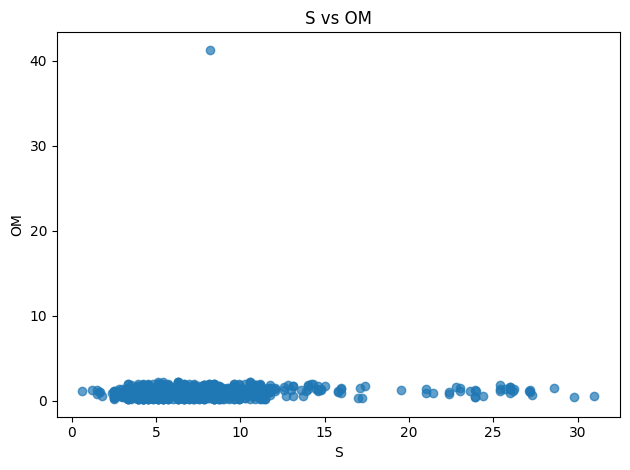

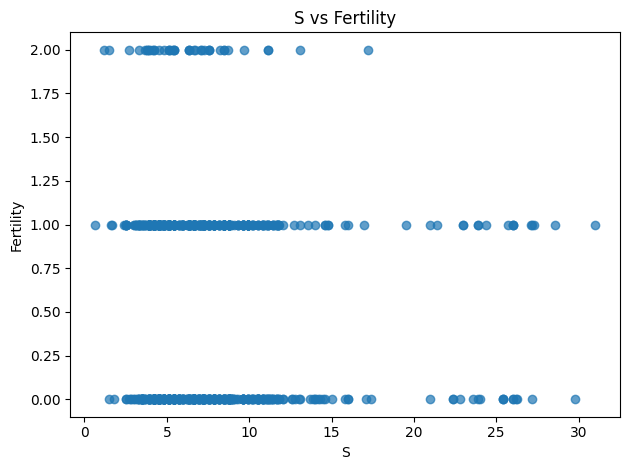

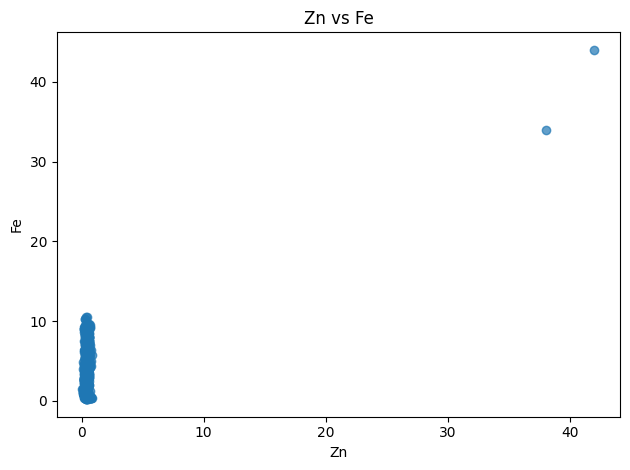

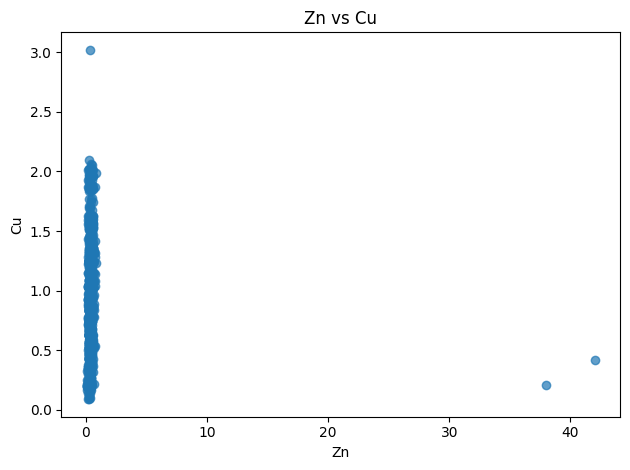

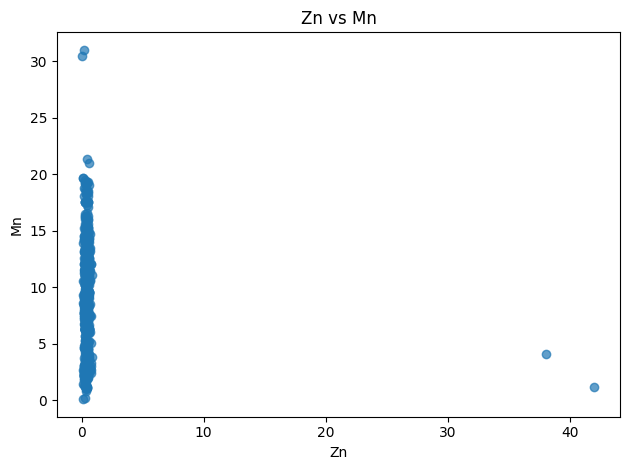

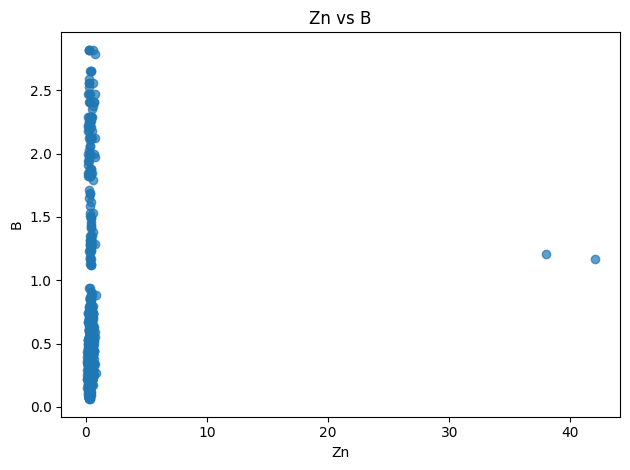

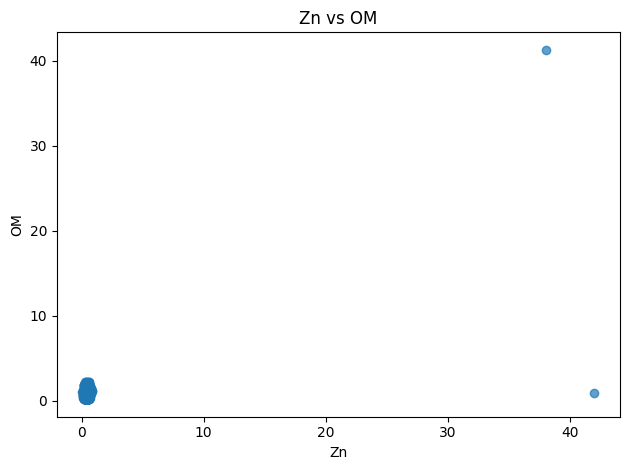

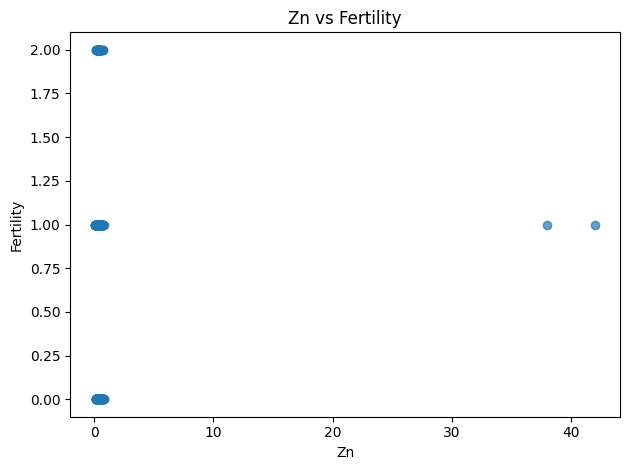

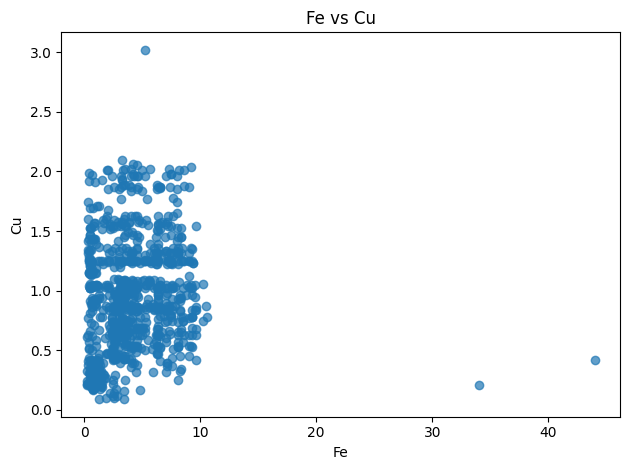

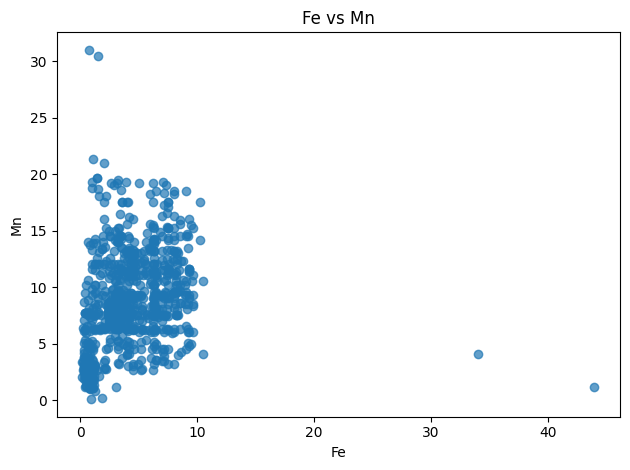

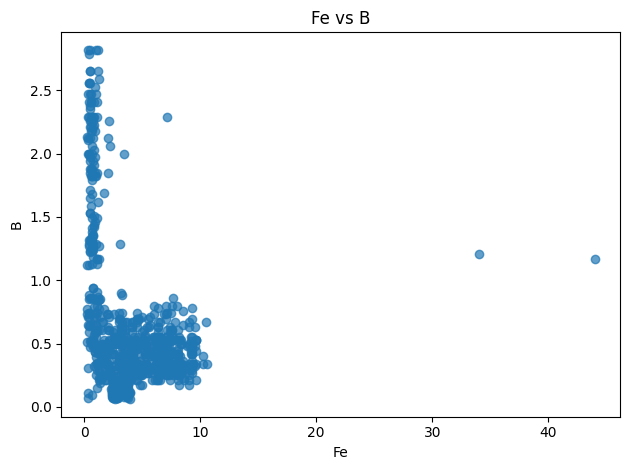

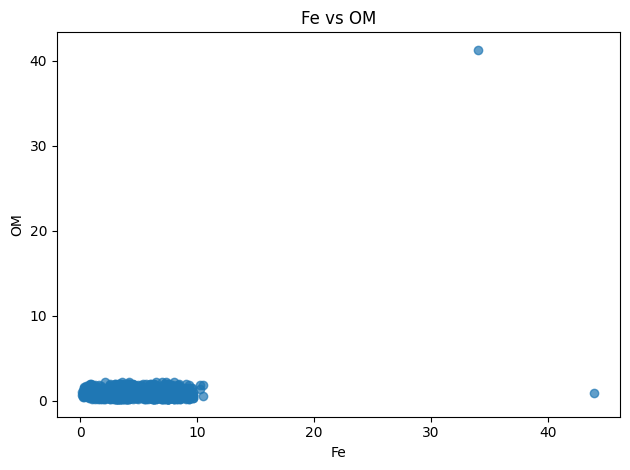

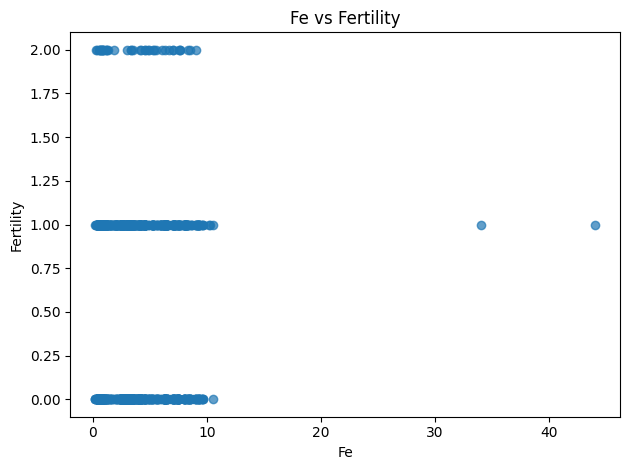

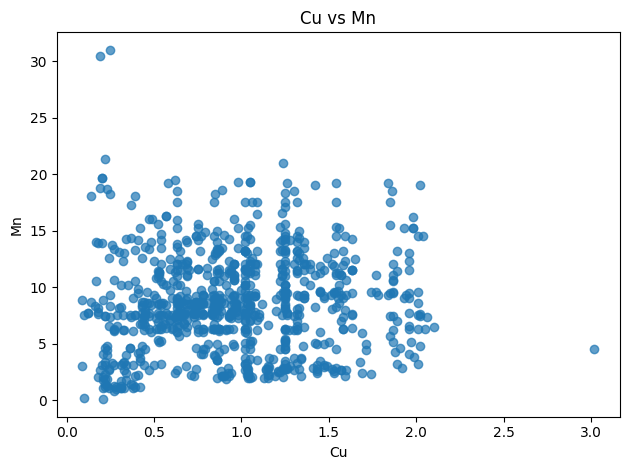

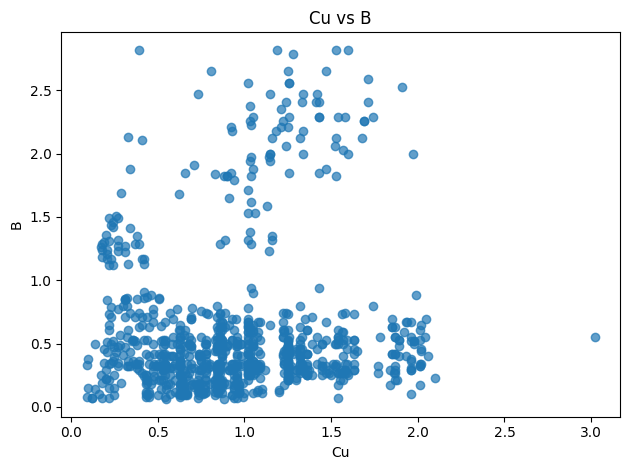

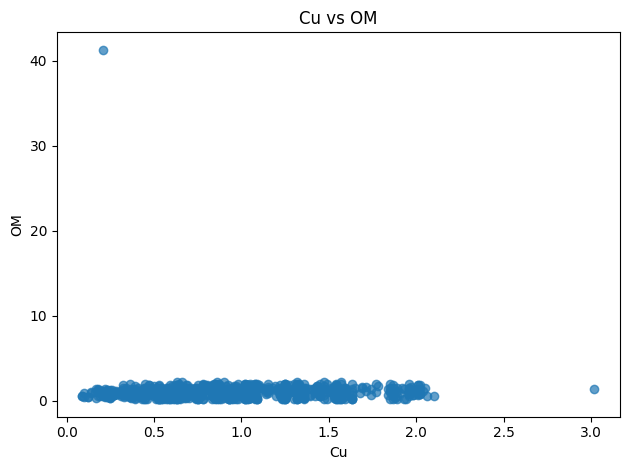

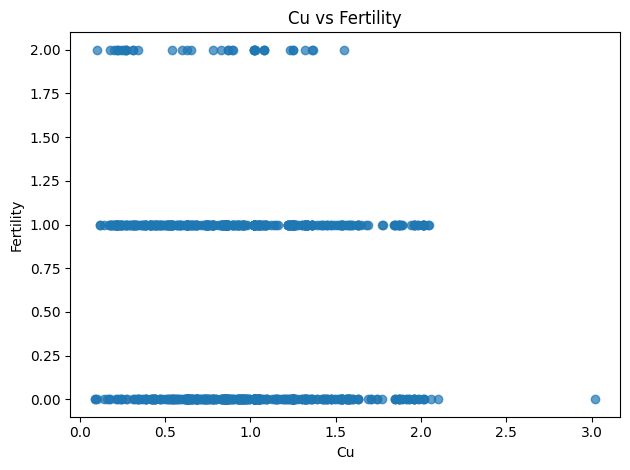

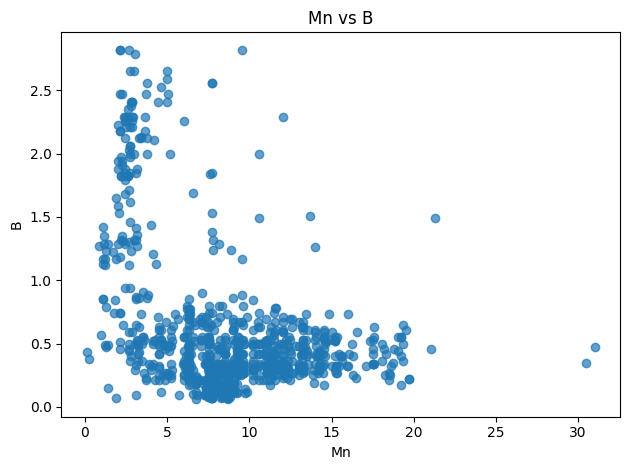

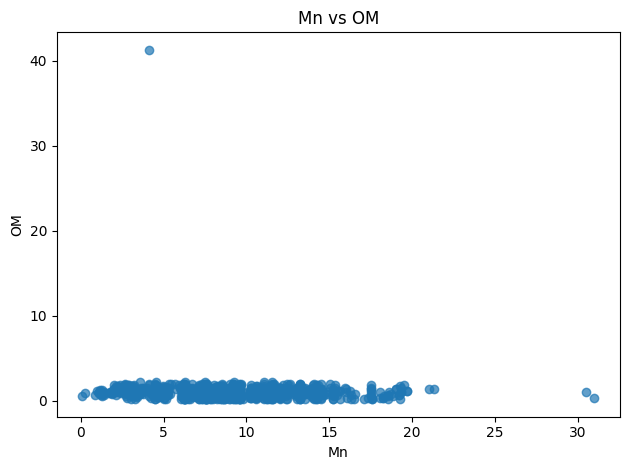

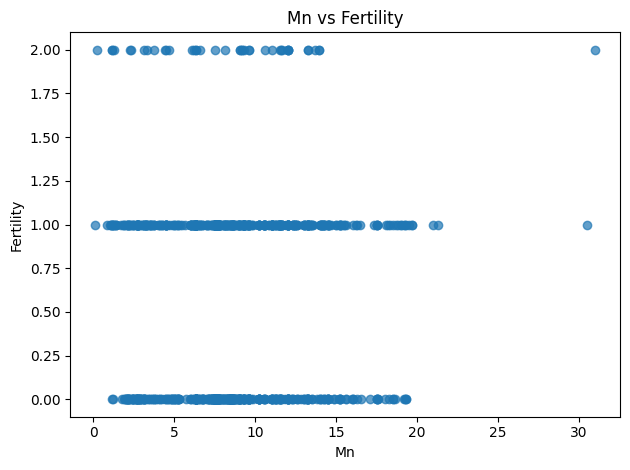

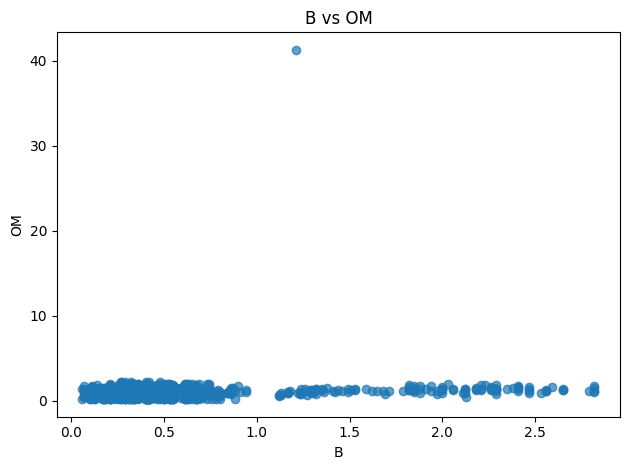

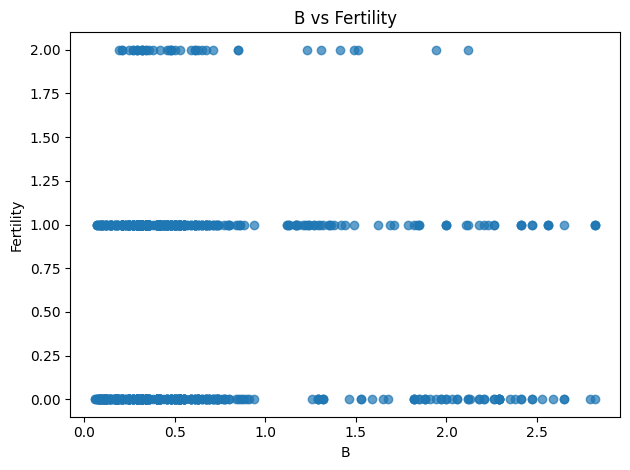

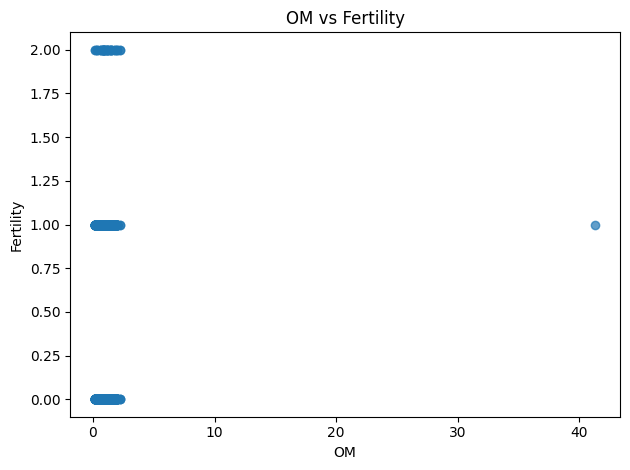

In [6]:
# Construction des diagrammes de dispersion pour toutes les paires d'attributs
plt.figure(figsize=(12, 8))
# Nombre total d'attributs
num_attributes = len(df.columns)
# Boucle pour créer des scatter plots pour chaque paire d'attributs
for i in range(num_attributes):
    for j in range(i+1, num_attributes):
        plt.scatter(df.iloc[:, i], df.iloc[:, j], alpha=0.7)
        plt.title(f"{df.columns[i]} vs {df.columns[j]}")
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        plt.tight_layout()
        plt.show()



1.1.3. Prétraitement

1. Traitement des valeurs manquantes et aberrantes :

a. Choix de la méthode de remplacement des valeurs manquantes.
        (Imputation par la mediane)

In [5]:
def eliminer_val_null(file_path):
    df = pd.read_csv(file_path)
    for col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        # Calcul de la médiane    
        tri= sorted(df[col_name])
        lenn= len(tri)
        if lenn % 2 ==1:
            mediane= tri[lenn // 2]
        else:
            milieu_inf = tri[lenn // 2]
            milieu_sup = tri[(lenn  // 2)-1]
            mediane = (milieu_inf+ milieu_sup)/2
        # Imputation des valeurs manquantes par la médiane
        df[col_name] = df[col_name].fillna(mediane)
    #df.head(30)
    return df

eliminer_val_null("Dataset1.csv")

N     P    K    pH    EC    OC      S    Zn    Fe    Cu     Mn     B  \
0    138   8.6  560  7.46  0.62  0.70   5.90  0.24  0.31  0.77   8.71  0.11   
1    213   7.5  338  7.62  0.75  1.06  25.40  0.30  0.86  1.54   2.89  2.29   
2    163   9.6  718  7.59  0.51  1.11  14.30  0.30  0.86  1.57   2.70  2.03   
3    157   6.8  475  7.64  0.58  0.94  26.00  0.34  0.54  1.53   2.65  1.82   
4    270   9.9  444  7.63  0.40  0.86  11.80  0.25  0.76  1.69   2.43  2.26   
..   ...   ...  ...   ...   ...   ...    ...   ...   ...   ...    ...   ...   
880  276   9.2  370  7.62  0.62  0.49   6.64  0.42  3.57  0.63   6.48  0.32   
881  320  13.8  391  7.38  0.65  1.07   5.43  0.58  4.58  1.02  13.25  0.53   
882  264  10.3  475  7.49  0.74  0.88  10.56  0.45  7.36  1.87  10.63  0.63   
883  220   8.6  444  7.43  0.65  0.72  11.70  0.37  0.66  0.90   2.19  1.82   
884  270   8.1  655  7.45  0.55  0.67  10.20  0.28  0.44  1.26   7.75  2.56   

         OM  Fertility  
0    1.2040          0  
1    1.8232          0  
2    1.9092          0  
3    1.6168          0  
4    1.4792          1  
..      ...        ...  
880  0.8428          1  
881  1.8404          2  
882  1.5136          0  
883  1.2384          0  
884  1.1524          1  

[885 rows x 14 columns]

b. Choix de la méthode de traitement des valeurs aberrantes.(Transformation Logarithmique)

In [6]:
def eliminer_val_aberantes(file_path):
    df=eliminer_val_null(file_path)
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            lower_limit = df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))
            upper_limit = df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))
            #print(f'{col}::{lower_limit}::{upper_limit}')
            # Remplacer les valeurs aberrantes par la transformation logarithmique
            #df_val_nul[col] = df_val_nul[col].apply(lambda x: np.log(df_val_nul[col]) if x < lower_limit or x > upper_limit else x)

            df[col] = np.where((df[col] < lower_limit) | (df[col] > upper_limit), np.log(df[col]), df[col])
    df.head()
    
    return df
eliminer_val_aberantes('Dataset1.csv')


c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


N     P      K    pH    EC    OC          S    Zn    Fe    Cu     Mn  \
0    138.0   8.6  560.0  7.46  0.62  0.70   5.900000  0.24  0.31  0.77   8.71   
1    213.0   7.5  338.0  7.62  0.75  1.06   3.234749  0.30  0.86  1.54   2.89   
2    163.0   9.6  718.0  7.59  0.51  1.11  14.300000  0.30  0.86  1.57   2.70   
3    157.0   6.8  475.0  7.64  0.58  0.94   3.258097  0.34  0.54  1.53   2.65   
4    270.0   9.9  444.0  7.63  0.40  0.86  11.800000  0.25  0.76  1.69   2.43   
..     ...   ...    ...   ...   ...   ...        ...   ...   ...   ...    ...   
880  276.0   9.2  370.0  7.62  0.62  0.49   6.640000  0.42  3.57  0.63   6.48   
881  320.0  13.8  391.0  7.38  0.65  1.07   5.430000  0.58  4.58  1.02  13.25   
882  264.0  10.3  475.0  7.49  0.74  0.88  10.560000  0.45  7.36  1.87  10.63   
883  220.0   8.6  444.0  7.43  0.65  0.72  11.700000  0.37  0.66  0.90   2.19   
884  270.0   8.1  655.0  7.45  0.55  0.67  10.200000  0.28  0.44  1.26   7.75   

            B      OM  Fertility  
0    0.110000  1.2040        0.0  
1    0.828552  1.8232        0.0  
2    0.708036  1.9092        0.0  
3    0.598837  1.6168        0.0  
4    0.815365  1.4792        1.0  
..        ...     ...        ...  
880  0.320000  0.8428        1.0  
881  0.530000  1.8404        2.0  
882  0.630000  1.5136        0.0  
883  0.598837  1.2384        0.0  
884  0.940007  1.1524        1.0  

[885 rows x 14 columns]

Réduction des données (élimination des redondances) horizontales / verticales.

In [7]:
def eliminer_redondance(file_path):
    df=eliminer_val_aberantes(file_path)
    df = df.drop_duplicates()
    # Supprimer les colonnes redondantes
    df = df.T.drop_duplicates().T
    return df
eliminer_redondance('Dataset1.csv')

c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


N     P      K    pH    EC    OC          S    Zn    Fe    Cu     Mn  \
0    138.0   8.6  560.0  7.46  0.62  0.70   5.900000  0.24  0.31  0.77   8.71   
1    213.0   7.5  338.0  7.62  0.75  1.06   3.234749  0.30  0.86  1.54   2.89   
2    163.0   9.6  718.0  7.59  0.51  1.11  14.300000  0.30  0.86  1.57   2.70   
3    157.0   6.8  475.0  7.64  0.58  0.94   3.258097  0.34  0.54  1.53   2.65   
4    270.0   9.9  444.0  7.63  0.40  0.86  11.800000  0.25  0.76  1.69   2.43   
..     ...   ...    ...   ...   ...   ...        ...   ...   ...   ...    ...   
878  351.0  10.7  623.0  7.96  0.51  0.29   7.240000  0.36  4.69  0.69  11.03   
879  264.0   9.0  486.0  7.24  0.47  0.10   3.920000  0.35  8.26  0.45   7.98   
880  276.0   9.2  370.0  7.62  0.62  0.49   6.640000  0.42  3.57  0.63   6.48   
881  320.0  13.8  391.0  7.38  0.65  1.07   5.430000  0.58  4.58  1.02  13.25   
882  264.0  10.3  475.0  7.49  0.74  0.88  10.560000  0.45  7.36  1.87  10.63   

            B      OM  Fertility  
0    0.110000  1.2040        0.0  
1    0.828552  1.8232        0.0  
2    0.708036  1.9092        0.0  
3    0.598837  1.6168        0.0  
4    0.815365  1.4792        1.0  
..        ...     ...        ...  
878  0.690000  0.4988        1.0  
879  0.400000  0.1720        1.0  
880  0.320000  0.8428        1.0  
881  0.530000  1.8404        2.0  
882  0.630000  1.5136        0.0  

[882 rows x 14 columns]

3. Normalisation des données :

a. Méthode Min-Max.

In [8]:
def min_max_normalisation(valeur, min_val, max_val, new_min, new_max):
    valeur_normalise = (valeur - min_val) / (max_val - min_val)
    return (valeur_normalise * (new_max - new_min)) + new_min

def normaliser_colonne_min_max(file_path, new_min, new_max):
    df= eliminer_redondance(file_path)
    colonnes_normalisees = {}
    for col in df.columns:
        x=df[col]
        
        # min et ma de la collone
        min_val = min(x)
        max_val = max(x)
        
        # normalisation
        colonne_normalisee = [min_max_normalisation(val, min_val, max_val, new_min, new_max) for val in x]
        
        # Enregistrez la colonne normalisée dans le dictionnaire
        colonnes_normalisees[col] = colonne_normalisee
        df[col] = colonne_normalisee
    

    return df

#test pour 0 et 1
normalized_column = normaliser_colonne_min_max('Dataset1.csv', 0, 1)
normalized_column.head(10)

c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


N         P         K        pH        EC        OC         S  \
0  0.357307  0.437232  0.670516  0.927655  0.898542  0.194928  0.371469   
1  0.554050  0.353577  0.403561  0.947274  0.938510  0.311885  0.183245   
2  0.422888  0.513282  0.860510  0.943595  0.864723  0.328129  0.964689   
3  0.407148  0.300343  0.568303  0.949726  0.886244  0.272900  0.184894   
4  0.703574  0.536097  0.531026  0.948500  0.830904  0.246909  0.788136   
5  0.572412  0.437232  0.531026  0.923976  0.907766  0.201426  0.781073   
6  0.572412  0.330763  0.264071  0.947274  0.840127  0.230665  0.477401   
7  0.538310  0.315553  0.479318  0.948500  0.889319  0.191680  0.491525   
8  0.868838  0.916345  0.504571  0.271819  0.855500  0.188431  0.551554   
9  0.753416  0.437232  0.670516  0.942369  0.843202  0.185182  0.470339   

         Zn        Fe        Cu        Mn         B        OM  Fertility  
0  0.128221  0.009671  0.338308  0.447683  0.047170  0.290837        0.0  
1  0.143176  0.062863  0.721393  0.144716  0.725049  0.465339        0.0  
2  0.143176  0.062863  0.736318  0.134826  0.611355  0.489576        0.0  
3  0.153146  0.031915  0.716418  0.132223  0.508336  0.407172        0.0  
4  0.130714  0.053191  0.796020  0.120770  0.712608  0.368394        0.5  
5  0.160623  0.043520  0.402985  0.108277  0.508336  0.300532        0.0  
6  0.153146  0.046422  0.477612  0.098386  0.538936  0.344157        0.0  
7  0.148161  0.045455  0.263682  0.120770  0.432824  0.285990        0.0  
8  0.195517  0.300774  0.492537  0.473712  0.245283  0.518659        1.0  
9  0.225427  0.043520  0.422886  0.120770  0.492656  0.276295        0.5

b. Méthode z-score.

In [9]:
def z_score_normalisation(file_path):
    df= eliminer_redondance(file_path)
    for col in df.columns:
        mean_val = sum(df[col]) / len(df[col])
        std_dev = (sum((x - mean_val) ** 2 for x in df[col]) / len(df[col])) ** 0.5
        normalized_values = [(x - mean_val) / std_dev for x in df[col]]
        df[col]=normalized_values
  

    return df
dd=z_score_normalisation('Dataset1.csv')
dd.head(10)

c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


N         P         K        pH        EC        OC         S  \
0 -1.389155  0.237202  0.519847  0.196518  0.464543  0.342790 -0.253534   
1 -0.429540 -0.182489 -1.210454  0.332586  1.228602  1.509102 -1.252884   
2 -1.069283  0.618738  1.751322  0.307073 -0.181968  1.671090  2.896090   
3 -1.146052 -0.449564 -0.142656  0.349595  0.229448  1.120331 -1.244129   
4  0.299768  0.733199 -0.384275  0.341090 -0.828480  0.861151  1.958702   
5 -0.339976  0.237202 -0.384275  0.171006  0.640865  0.407585  1.921207   
6 -0.339976 -0.296950 -2.114576  0.332586 -0.652158  0.699163  0.308899   
7 -0.506309 -0.373257 -0.719423  0.341090  0.288222  0.310392  0.383890   
8  1.105845  2.640882 -0.555746 -4.352033 -0.358290  0.277994  0.702602   
9  0.542870  0.237202  0.519847  0.298569 -0.593385  0.245597  0.271403   

         Zn        Fe        Cu        Mn         B        OM  Fertility  
0 -0.686796 -1.435062 -0.391873  0.048625 -1.419955  0.352988  -1.024446  
1 -0.392136 -1.224497  1.282203 -1.372222  1.914017  1.547280  -1.024446  
2 -0.392136 -1.224497  1.347427 -1.418607  1.354841  1.713154  -1.024446  
3 -0.195696 -1.347008  1.260462 -1.430814  0.848173  1.149183  -1.024446  
4 -0.637686 -1.262781  1.608322 -1.484523  1.852831  0.883785   0.709837  
5 -0.048366 -1.301066 -0.109237 -1.543114  0.848173  0.419338  -1.024446  
6 -0.195696 -1.289581  0.216882 -1.589499  0.998667  0.717911  -1.024446  
7 -0.293916 -1.293409 -0.717992 -1.484523  0.476786  0.319813  -1.024446  
8  0.639173 -0.282695  0.282106  0.170691 -0.445587  1.912203   2.444120  
9  1.228493 -1.301066 -0.022272 -1.484523  0.771054  0.253464   0.709837

1.2. Données temporelles

1.2.1. Prétraitement

In [10]:
def traitement_val_manq(file_path):
    df = pd.read_csv(file_path)
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            tri= sorted(df[col])
            lenn= len(tri)
            if lenn % 2 ==1:
                mediane= tri[lenn // 2]
            else:
                milieu_inf = tri[lenn // 2]
                milieu_sup = tri[(lenn  // 2)-1]
                mediane = (milieu_inf+ milieu_sup)/2
            
            # Imputation des valeurs manquantes par la médiane
            df[col] = df[col].fillna(mediane)
        
    return df

dd=traitement_val_manq('Dataset2.csv')
dd.head(30)


    

zcta  time_period  population  Start date    end date  case count  \
0   95129           32       39741  10/11/2020  10/31/2020        22.0   
1   95129           43       39741   5/30/2021   6/19/2021        16.0   
2   95129           40       39741   3/28/2021   4/17/2021        34.0   
3   95129           55       39741    2/6/2022   2/26/2022       110.0   
4   95129           44       39741   6/20/2021   7/10/2021        14.0   
5   95129           54       39741   1/16/2022    2/5/2022       624.0   
6   95129           25       39741   5/17/2020    6/6/2020        16.0   
7   95129           30       39741   8/30/2020   9/19/2020        20.0   
8   95129           31       39741   9/20/2020  10/10/2020        12.0   
9   95129           66       39741   9/25/2022  10/15/2022        66.0   
10  95129           48       39741   9/12/2021   10/2/2021        40.0   
11  95129           34       39741  11/22/2020  12/12/2020       211.0   
12  95129           33       39741   11/1/2020  11/21/2020        95.0   
13  95129           38       39741   2/14/2021    3/6/2021        33.0   
14  95129           61       39741   6/12/2022    7/2/2022       512.0   
15  95129           62       39741    7/3/2022   7/23/2022       318.0   
16  95129           50       39741  10/24/2021  11/13/2021        39.0   
17  95129           65       39741    9/4/2022   9/24/2022        86.0   
18  95129           49       39741   10/3/2021  10/23/2021        29.0   
19  95129           27       39741   6/28/2020   7/18/2020        27.0   
20  95129           37       39741   1/24/2021   2/13/2021        50.0   
21  95129           24       39741   4/26/2020   5/16/2020        16.0   
22  95129           35       39741  12/13/2020    1/2/2021       198.0   
23  95129           23       39741    4/5/2020   4/25/2020        16.0   
24  95129           36       39741    1/3/2021   1/23/2021       225.0   
25  95129           22       39741   3/15/2020    4/4/2020        16.0   
26  95129           21       39741   2/23/2020   3/14/2020        16.0   
27  95129           19       39741   1/12/2020    2/1/2020         0.0   
28  95129           42       39741    5/9/2021   5/29/2021        16.0   
29  95129           60       39741   5/22/2022   6/11/2022       456.0   

    test count  positive tests  case rate  test rate  positivity rate  
0       2543.0            23.0        2.6      304.7              0.9  
1       3315.0            14.0        1.1      397.2              0.4  
2       4816.0            37.0        4.1      577.1              0.8  
3      10194.0           175.0       13.2     1221.5              1.7  
4       3033.0            17.0        1.7      363.4              0.6  
5      13479.0           817.0       74.8     1615.1              6.1  
6        762.0            16.0        0.4       91.3              0.4  
7       1773.0            20.0        2.4      212.4              1.1  
8       2120.0            12.0        1.4      254.0              0.6  
9       1571.0            78.0        7.9      188.2              5.0  
10      6305.0            48.0        4.8      755.5              0.8  
11      4063.0           233.0       25.3      486.8              5.7  
12      3204.0           102.0       11.4      383.9              3.2  
13      4468.0            38.0        4.0      535.4              0.9  
14      3829.0           590.0       61.3      458.8             15.4  
15      3266.0           383.0       38.1      391.3             11.7  
16      5449.0            44.0        4.7      652.9              0.8  
17      2096.0            94.0       10.3      251.2              4.5  
18      5902.0            40.0        3.5      707.2              0.7  
19      2027.0            42.0        3.2      242.9              2.1  
20      4657.0            67.0        6.0      558.0              1.4  
21       357.0            16.0        0.1       42.8              0.8  
22      4352.0           216.0       23.7      521.5  

In [11]:
def traitement_val_aberr(file_path):
    df = traitement_val_manq(file_path)
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            lower_limit = df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))
            upper_limit = df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))
            #print(f'{col}::{lower_limit}::{upper_limit}')
            # Remplacer les valeurs aberrantes par la transformation logarithmique
            #df_val_nul[col] = df_val_nul[col].apply(lambda x: np.log(df_val_nul[col]) if x < lower_limit or x > upper_limit else x)

            df[col] = np.where((df[col] < lower_limit) | (df[col] > upper_limit), np.log(df[col]), df[col])
    
    return df
dd=traitement_val_aberr('Dataset2.csv')
dd.head(30)

c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


zcta  time_period  population  Start date    end date  case count  \
0   95129.0         32.0     39741.0  10/11/2020  10/31/2020   22.000000   
1   95129.0         43.0     39741.0   5/30/2021   6/19/2021   16.000000   
2   95129.0         40.0     39741.0   3/28/2021   4/17/2021   34.000000   
3   95129.0         55.0     39741.0    2/6/2022   2/26/2022  110.000000   
4   95129.0         44.0     39741.0   6/20/2021   7/10/2021   14.000000   
5   95129.0         54.0     39741.0   1/16/2022    2/5/2022    6.436150   
6   95129.0         25.0     39741.0   5/17/2020    6/6/2020   16.000000   
7   95129.0         30.0     39741.0   8/30/2020   9/19/2020   20.000000   
8   95129.0         31.0     39741.0   9/20/2020  10/10/2020   12.000000   
9   95129.0         66.0     39741.0   9/25/2022  10/15/2022   66.000000   
10  95129.0         48.0     39741.0   9/12/2021   10/2/2021   40.000000   
11  95129.0         34.0     39741.0  11/22/2020  12/12/2020  211.000000   
12  95129.0         33.0     39741.0   11/1/2020  11/21/2020   95.000000   
13  95129.0         38.0     39741.0   2/14/2021    3/6/2021   33.000000   
14  95129.0         61.0     39741.0   6/12/2022    7/2/2022    6.238325   
15  95129.0         62.0     39741.0    7/3/2022   7/23/2022  318.000000   
16  95129.0         50.0     39741.0  10/24/2021  11/13/2021   39.000000   
17  95129.0         65.0     39741.0    9/4/2022   9/24/2022   86.000000   
18  95129.0         49.0     39741.0   10/3/2021  10/23/2021   29.000000   
19  95129.0         27.0     39741.0   6/28/2020   7/18/2020   27.000000   
20  95129.0         37.0     39741.0   1/24/2021   2/13/2021   50.000000   
21  95129.0         24.0     39741.0   4/26/2020   5/16/2020   16.000000   
22  95129.0         35.0     39741.0  12/13/2020    1/2/2021  198.000000   
23  95129.0         23.0     39741.0    4/5/2020   4/25/2020   16.000000   
24  95129.0         36.0     39741.0    1/3/2021   1/23/2021  225.000000   
25  95129.0         22.0     39741.0   3/15/2020    4/4/2020   16.000000   
26  95129.0         21.0     39741.0   2/23/2020   3/14/2020   16.000000   
27  95129.0         19.0     39741.0   1/12/2020    2/1/2020    0.000000   
28  95129.0         42.0     39741.0    5/9/2021   5/29/2021   16.000000   
29  95129.0         60.0     39741.0   5/22/2022   6/11/2022  456.000000   

    test count  positive tests  case rate    test rate  positivity rate  
0       2543.0       23.000000   2.600000   304.700000         0.900000  
1       3315.0       14.000000   1.100000   397.200000         0.400000  
2       4816.0       37.000000   4.100000   577.100000         0.800000  
3      10194.0      175.000000  13.200000     7.107835         1.700000  
4       3033.0       17.000000   1.700000   363.400000         0.600000  
5      13479.0        6.705639   4.314818     7.387152         6.100000  
6        762.0       16.000000   0.400000    91.300000         0.400000  
7       1773.0       20.000000   2.400000   212.400000         1.100000  
8       2120.0       12.000000   1.400000   254.000000         0.600000  
9       1571.0       78.000000   7.900000   188.200000         5.000000  
10      6305.0       48.000000   4.800000   755.500000         0.800000  
11      4063.0      233.000000  25.300000   486.800000         5.700000  
12      3204.0      102.000000  11.400000   383.900000         3.200000  
13      4468.0       38.000000   4.000000   535.400000         0.900000  
14      3829.0        6.380123   4.115780   458.800000         2.734368  
15      3266.0      383.000000  38.100000   391.300000        11.700000  
16      5449.0       44.000000   4.700000   652.900000         0.800000  
17      2096.0       94.000000  10.300000   251.200000         4.500000  
18      5902.0       40.000000   3.500000   707.200000         0.700000  
19      2027.0       42.000000   3.200000   242.900000         2.100000  
20      4657.0       67.000000   6.000000   558.000000         1.400000  
21       357.0       1

La distribution du nombre total des cas confirmés et tests positifs par zones

c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


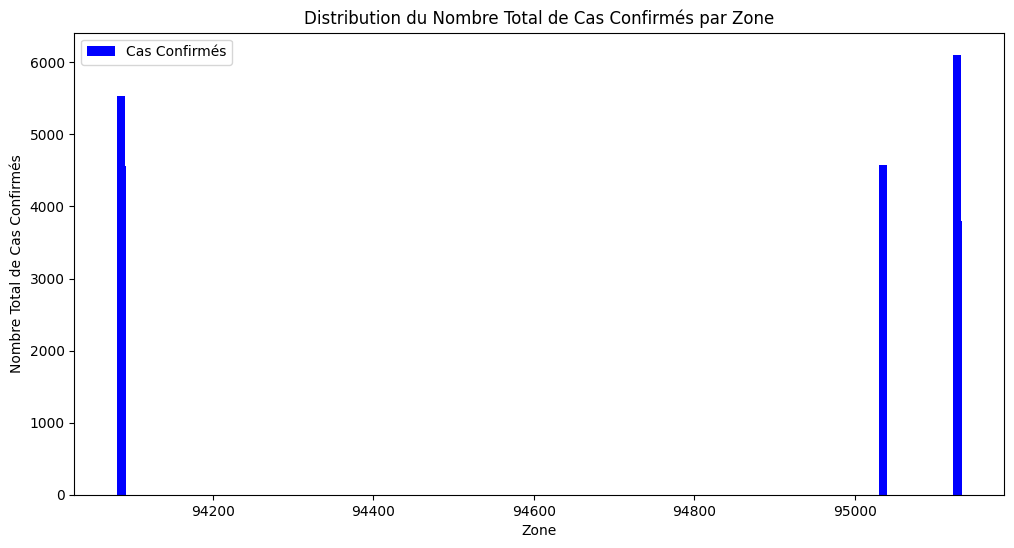

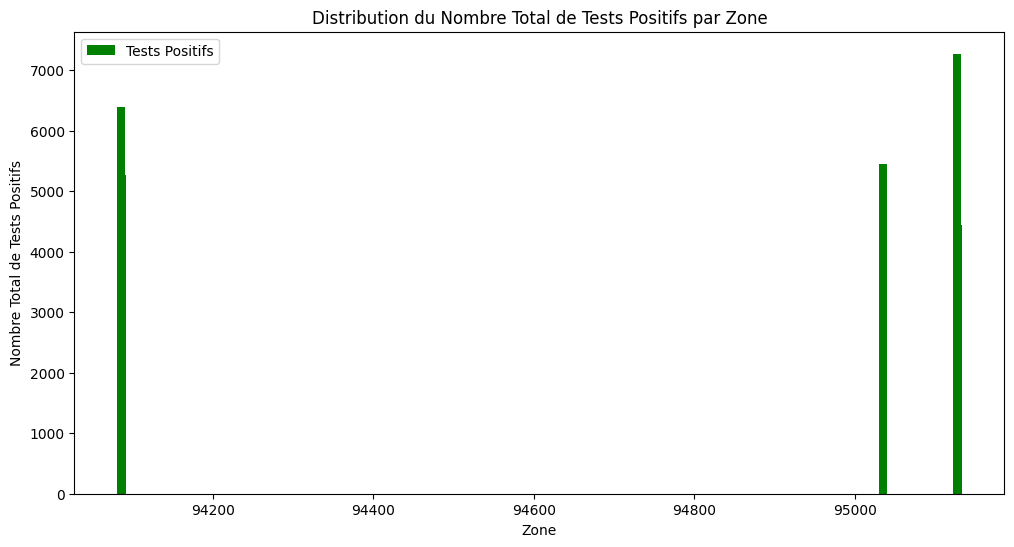

In [12]:
def destribution_cas_par_zones(file_path):
    df = traitement_val_aberr(file_path)

    # Calculer le nombre total de cas confirmés et de tests positifs par zone
    total_cases_by_zone = df.groupby('zcta')['case count'].sum()
    total_positive_tests_by_zone = df.groupby('zcta')['positive tests'].sum()

    # Créer un graphique à barres pour le nombre total de cas confirmés
    plt.figure(figsize=(12, 6))
    plt.bar(total_cases_by_zone.index, total_cases_by_zone, color='blue', label='Cas Confirmés', width=10)
    plt.xlabel('Zone')
    plt.ylabel('Nombre Total de Cas Confirmés')
    plt.title('Distribution du Nombre Total de Cas Confirmés par Zone')
    plt.legend()
    plt.show()

    # Créer un graphique à barres pour le nombre total de tests positifs
    plt.figure(figsize=(12, 6))
    plt.bar(total_positive_tests_by_zone.index, total_positive_tests_by_zone, color='green', label='Tests Positifs', width=10)
    plt.xlabel('Zone')
    plt.ylabel('Nombre Total de Tests Positifs')
    plt.title('Distribution du Nombre Total de Tests Positifs par Zone')
    plt.legend()
    plt.show()

destribution_cas_par_zones('Dataset2.csv')

Comment les tests COVID-19, les tests positifs et le nombre de cas évolue au fil du temps 
(hebdomadaire, mensuel et annuel) pour une zone choisit

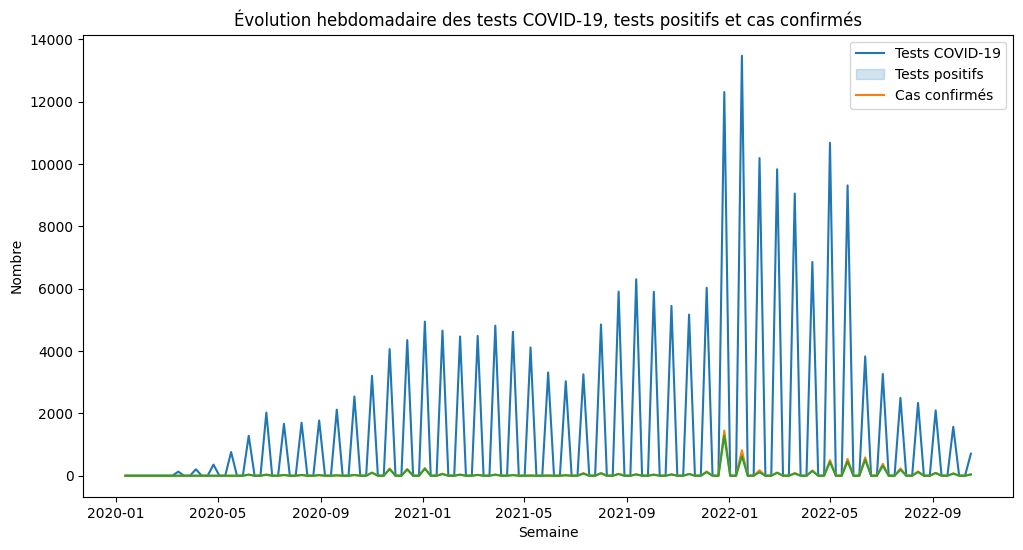

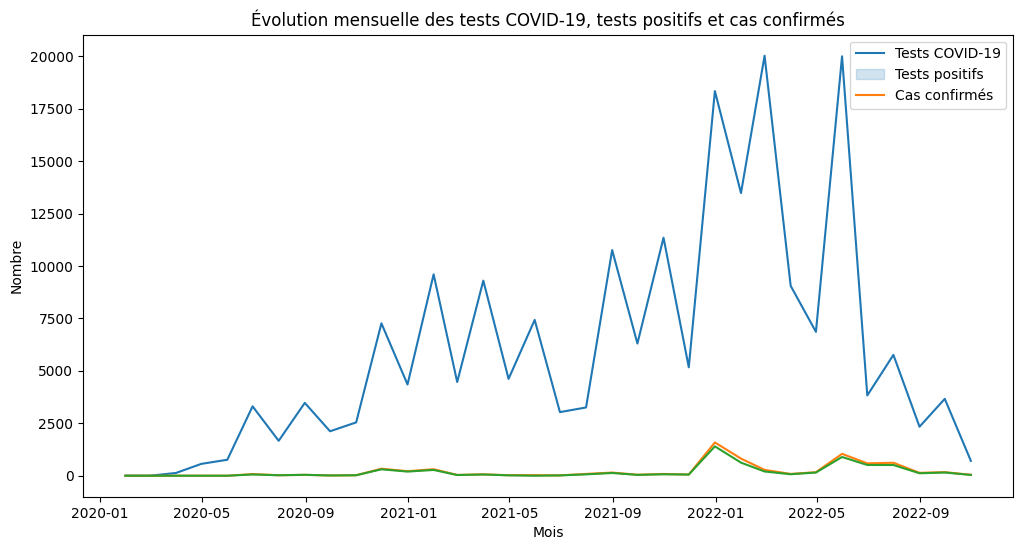

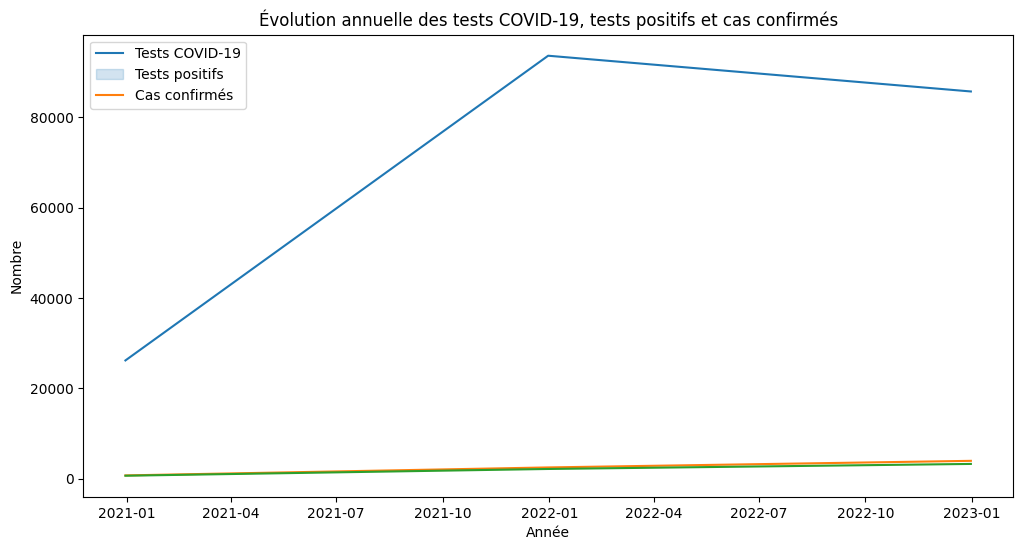

In [14]:
import seaborn as sns
def test_covid_par_temps(file_path,selected_zone):
    df = pd.read_csv(file_path)

    # Supposons que vous avez choisi la zone avec le code postal '95129'
    #selected_zone = '95128'
    zone_selected = df[df['zcta'] == selected_zone]
    zone_selected = zone_selected.dropna(subset=['Start date'])
    zone_selected['Start date'] = pd.to_datetime(zone_selected['Start date'])

    zone_selected.set_index('Start date', inplace=True)

    zone_selected_weekly = zone_selected.resample('W').sum()  # Agrégation hebdomadaire
    zone_selected_monthly = zone_selected.resample('M').sum()  # Agrégation month
    zone_selected_yearly = zone_selected.resample('Y').sum()  # Agrégation year

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=zone_selected_weekly[['test count', 'positive tests', 'case count']], dashes=False)
    plt.title('Évolution hebdomadaire des tests COVID-19, tests positifs et cas confirmés')
    plt.xlabel('Semaine')
    plt.ylabel('Nombre')
    plt.legend(['Tests COVID-19', 'Tests positifs', 'Cas confirmés'])
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=zone_selected_monthly[['test count', 'positive tests', 'case count']], dashes=False)
    plt.title('Évolution mensuelle des tests COVID-19, tests positifs et cas confirmés')
    plt.xlabel('Mois')
    plt.ylabel('Nombre')
    plt.legend(['Tests COVID-19', 'Tests positifs', 'Cas confirmés'])
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=zone_selected_yearly[['test count', 'positive tests', 'case count']], dashes=False)
    plt.title('Évolution annuelle des tests COVID-19, tests positifs et cas confirmés')
    plt.xlabel('Année')
    plt.ylabel('Nombre')
    plt.legend(['Tests COVID-19', 'Tests positifs', 'Cas confirmés'])
    plt.show()

test_covid_par_temps('Dataset2.csv',95129)

Comment les cas covid positifs sont distribués par zone et par année

c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 1200x600 with 0 Axes>

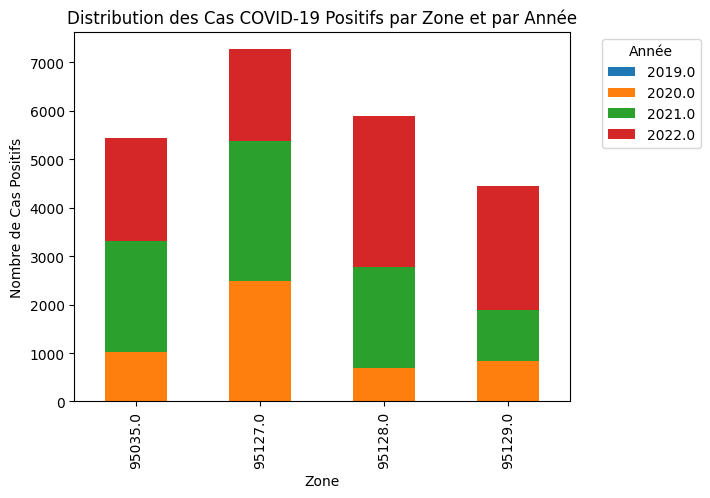

In [15]:
def destribution_cas_par_zone(file_path):
    df = traitement_val_aberr(file_path)

    # Convertir la colonne de dates en format datetime en gérant les deux formats
    df['Start date'] = pd.to_datetime(df['Start date'], errors='coerce')
    df['end date'] = pd.to_datetime(df['end date'], errors='coerce')

    # Extraire l'année à partir de la colonne de dates
    df['Year'] = df['Start date'].dt.year

    # Créer un tableau croisé dynamique pour obtenir la distribution des cas positifs par zone et par année
    pivot_table = pd.pivot_table(df, values='positive tests', index='zcta', columns='Year', aggfunc='sum', fill_value=0)

    # Créer un graphique à barres empilées
    plt.figure(figsize=(12, 6))
    pivot_table.plot(kind='bar', stacked=True)
    plt.xlabel('Zone')
    plt.ylabel('Nombre de Cas Positifs')
    plt.title('Distribution des Cas COVID-19 Positifs par Zone et par Année')
    plt.legend(title='Année', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

destribution_cas_par_zone('Dataset2.csv')

Comment peut-on efficacement graphiquement représenter le rapport entre la population 
et le nombre de tests effectués

c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


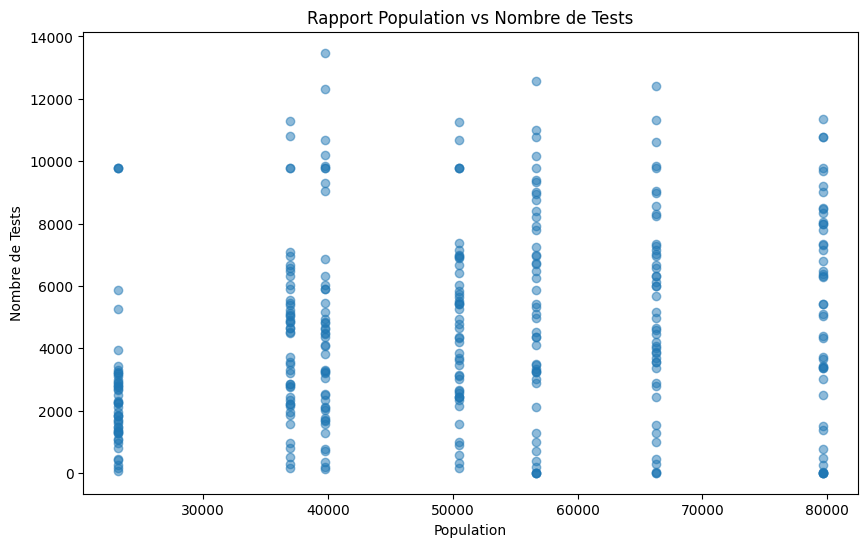

In [16]:
def rapport_pop_tests(file_path):
    df = traitement_val_aberr(file_path)

    # Créer un graphique à dispersion
    plt.figure(figsize=(10, 6))
    plt.scatter(df['population'], df['test count'], alpha=0.5)
    plt.title('Rapport Population vs Nombre de Tests')
    plt.xlabel('Population')
    plt.ylabel('Nombre de Tests')
    plt.show()

rapport_pop_tests('Dataset2.csv')

Quelles sont les 5 zones les plus fortement impactées par le coronavirus

In [17]:
def top_5_zones_corona(file_path):
    df = traitement_val_aberr(file_path)

    # Grouper par zone et calculer le nombre total de tests positifs
    total_positive_tests_by_zone = df.groupby('zcta')['positive tests'].sum()

    # Trier les zones par nombre total de tests positifs de manière décroissante
    top_5_zones = total_positive_tests_by_zone.sort_values(ascending=False).head(5)

    # Afficher les 5 zones les plus fortement impactées dans un tableau
    result_table = pd.DataFrame({'Zone': top_5_zones.index, 'Nombre de Tests Positifs': top_5_zones.values})
    print(result_table)
top_5_zones_corona('Dataset2.csv')

      Zone  Nombre de Tests Positifs
0  95127.0               7268.934912
1  94086.0               6394.410146
2  95128.0               5904.889496
3  95035.0               5439.916767
4  94087.0               5267.974338


c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Quel est le rapport entre les cas confirmés, les tests effectués et les tests positifs au fil du 
temps pour chaque zone ?

c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Mouaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


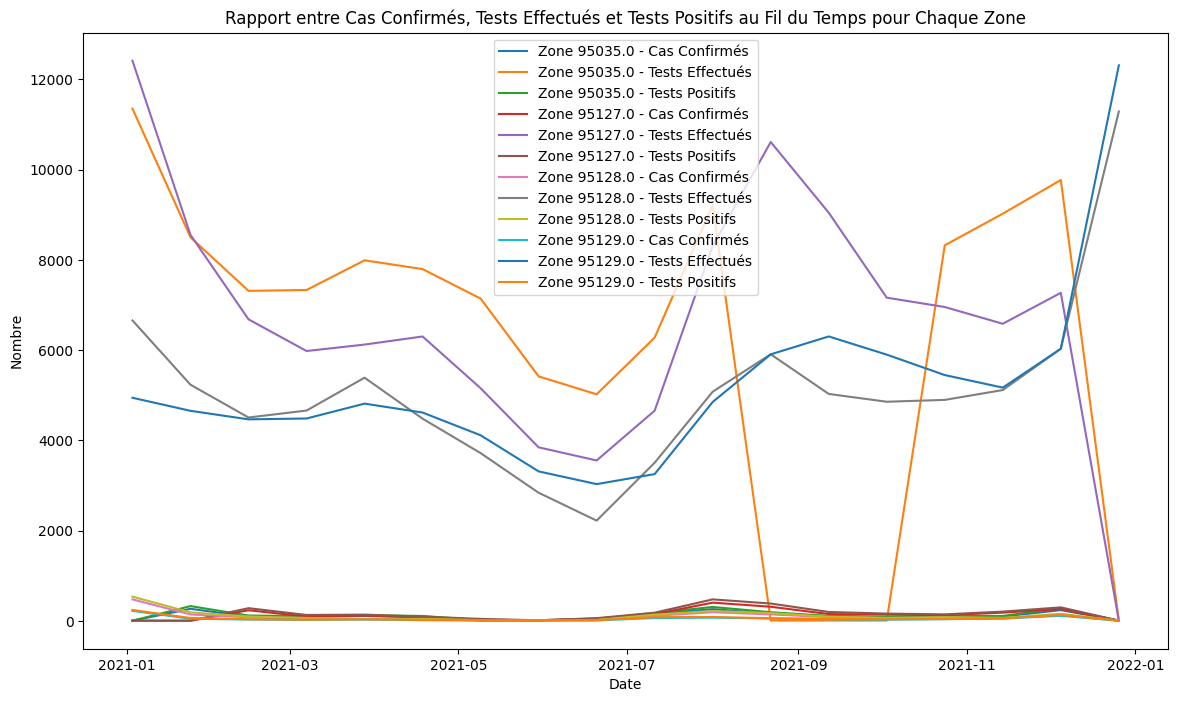

In [20]:
def rapport_cases_chaque_zone(start_date,end_date):
    # Charger le fichier CSV dans un DataFrame
    file_path = "Dataset2.csv"
    df = traitement_val_aberr(file_path)

    # Convertir la colonne de dates en format datetime
    df['Start date'] = pd.to_datetime(df['Start date'], errors='coerce')


    # Choisir une période spécifique (par exemple, entre le 1er janvier 2021 et le 31 décembre 2021)
    #start_date = '2021-01-01'
    #end_date = '2021-12-31'

    # Filtrer les données pour la période choisie
    selected_period_data = df[(df['Start date'] >= start_date) & (df['Start date'] <= end_date)]

    # Grouper par zone et date, puis calculer les sommes pour chaque variable
    grouped_data = selected_period_data.groupby(['zcta', 'Start date']).agg({
        'case count': 'sum',
        'test count': 'sum',
        'positive tests': 'sum'
    }).reset_index()

    # Afficher le rapport au fil du temps pour chaque zone
    unique_zones = grouped_data['zcta'].unique()

    plt.figure(figsize=(14, 8))

    for zone in unique_zones:
        zone_data = grouped_data[grouped_data['zcta'] == zone]
        plt.plot(zone_data['Start date'], zone_data['case count'], label=f'Zone {zone} - Cas Confirmés')
        plt.plot(zone_data['Start date'], zone_data['test count'], label=f'Zone {zone} - Tests Effectués')
        plt.plot(zone_data['Start date'], zone_data['positive tests'], label=f'Zone {zone} - Tests Positifs')

    plt.xlabel('Date')
    plt.ylabel('Nombre')
    plt.title('Rapport entre Cas Confirmés, Tests Effectués et Tests Positifs au Fil du Temps pour Chaque Zone')
    plt.legend()
    plt.show()

rapport_cases_chaque_zone('2021-01-01','2021-12-31')